# Uncertainty Quantification

## Overview
    we will analyze why we cannot get the right count for some transcripts using the output of salmon. 

## Analyze tools
    we will mainly use dataframe of pandas to analyze the data.

In [2]:
import tsv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

## root path

In [3]:
root_path = "../data/poly_mo/"

# data Preprocess

## Poly Truth
    Read the file poly_truth.tsv
    Poly_truth.tsv: true counts for each transcript

In [4]:
# Poly_truth.tsv: true counts for each transcript
poly_truth = open(root_path+"poly_truth.tsv")
lines = poly_truth.readlines()
poly_truth.close()
# print l
count = 0
poly_truth = []
for line in lines:
    line = line[:-1]
    l = line.split('\t')
    poly_truth.append(l)

df_poly_truth = pd.DataFrame.from_records(poly_truth[1:], columns=poly_truth[0])

In [5]:
df_poly_truth['transcript_id']=df_poly_truth['transcript_id'].astype(str)
df_poly_truth['count']=df_poly_truth['count'].astype(int)

In [6]:
df_poly_truth.describe()

,count
count,2.695900e+04
mean,1.483678e+03
std,1.504054e+04
min,1.000000e+00
25%,1.700000e+01
50%,1.420000e+02
75%,7.350000e+02
max,1.316896e+06


In [7]:
df_poly_truth.head(5)

,transcript_id,count
0,ENST00000608495,1
1,ENST00000382369,55
2,ENST00000360321,54
3,ENST00000400269,92
4,ENST00000382352,2653


In [8]:
truth_id = df_poly_truth.transcript_id

## Quant_bootstraps
    Read the file quant_bootstraps.tsv
    Quant_bootstraps.tsv :containing the matrix of bootstrap experiments containing the final count for each transcript in each round of bootstrapping with a row be a bootstrap output and columns be list of transcripts. 

In [9]:
# Quant_bootstraps.tsv :containing the matrix of bootstrap experiments 
# containing the final count for each transcript in each round of bootstrapping 
# with a row be a bootstrap output and columns be list of transcripts. 

quant_bootstraps = tsv.TsvReader(open(root_path+"quant_bootstraps.tsv"))
count = 0
quant_boot = []
for parts in quant_bootstraps:
    quant_boot.append(parts)
#     print len(parts)
print(len(quant_boot))

201


In [10]:
df_quant_boot = pd.DataFrame.from_records(quant_boot[1:], columns=quant_boot[0])
# print(len(quant_boot[1,:]))

In [18]:
new_dfqb = df_quant_boot.copy()

In [11]:
df_quant_boot.describe()

,ENST00000382410,ENST00000382398,ENST00000382388,ENST00000334391,ENST00000246105,ENST00000382376,ENST00000608495,ENST00000382369,ENST00000360321,ENST00000400269,...,ENST00000361739,ENST00000361851,ENST00000361899,ENST00000362079,ENST00000361227,ENST00000361335,ENST00000361381,ENST00000361567,ENST00000361681,ENST00000361789
count,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
unique,1,1,1,1,1,1,1,200,200,200,...,190,148,187,187,172,165,191,180,185,187
top,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.1297727966,48.9200787947,63.8905505627,...,340011.0,8122.0,225783.0,350500.0,30701.0,22438.0,416512.0,209890.0,72502.0,155444.0
freq,200,200,200,200,200,200,200,1,1,1,...,3,4,2,2,3,3,2,3,2,3


In [11]:
id_qb = list(df_quant_boot.columns)

### Sort the quant_boot Results
#### Attention: there are some ids in truth_id but not in quant_boot

In [22]:
sort_qb = []
for id in columns:
    try:
        listed = list(df_quant_boot[id])        
    except KeyError:
#         print('has No '+id) # there are some ids in truth_id but not in quant_boot
        pass
    else:
        listed.sort()
        sort_qb.append(listed)

### reverse sort_qb

In [23]:
sort_qb = list(map(list,zip(*sort_qb)))

### transfer to dataframe

In [25]:
df_qb_sorted = pd.DataFrame.from_records(sort_qb, columns=columns)

## Filter the False

### find the value of 2.5% & 97.5% and the false transcript is out of this range

In [15]:
df_poly_truth = df_poly_truth.set_index(['transcript_id'])

In [26]:
sum = len(sort_qb)
print(int(sum*0.025))
print(int(sum*0.975))
percent2dot5 = df_qb_sorted.loc[int(sum*0.025)-1]
percent97dot5 = df_qb_sorted.loc[int(sum*0.975)-1]

5
195


In [27]:
print(percent97dot5)

ENST00000382410              0.0
ENST00000382398              0.0
ENST00000382388              0.0
ENST00000334391              0.0
ENST00000246105              0.0
ENST00000382376              0.0
ENST00000608495              0.0
ENST00000382369    70.6074712453
ENST00000360321    65.4908637938
ENST00000400269    91.0611452369
ENST00000382352           2116.0
ENST00000342665           2069.0
ENST00000544632              0.0
ENST00000382291              0.0
ENST00000382285              0.0
ENST00000470439              0.0
ENST00000609179            211.0
ENST00000609504              0.0
ENST00000608875              0.0
ENST00000608736              0.0
ENST00000217233    307.158748154
ENST00000449710    275.289883139
ENST00000422053    237.664083695
ENST00000475269              0.0
ENST00000400247              0.0
ENST00000411647    733.941635608
ENST00000441733              0.0
ENST00000414880    3.06628900716
ENST00000356286              0.0
ENST00000353660              0.0
          

In [28]:
fixed_dfquant_boot = df_quant_boot.copy()
columns = fixed_dfquant_boot.columns

In [38]:
remove_ids = []
for id in columns:
    if float(percent97dot5[id]) == 0:
        remove_ids.append(id)
        

In [40]:
len(remove_ids)

59144

In [41]:
new_columns = set(columns)-set(remove_ids)
new_columns = list(new_columns)
fixed_dfquant_boot = fixed_dfquant_boot[new_columns] 

In [42]:
# fixed_dfquant_boot.describe()

In [43]:
fixed_dfquant_boot.head(5)

,ENST00000216274,ENST00000456860,ENST00000278359,ENST00000396420,ENST00000594214,ENST00000411978,ENST00000589437,ENST00000523840,ENST00000526856,ENST00000311450,...,ENST00000559388,ENST00000511587,ENST00000223369,ENST00000415553,ENST00000377687,ENST00000543469,ENST00000394897,ENST00000374049,ENST00000407188,ENST00000366791
0,245.0,389.0,154.63645525,911.553815162,0.0,0.0,0.0,2.0,742.327446871,0.0,...,12735.1907835,9.95190956383,2.95207802188,62.0,17.0,1.43552410227,16.4889972599,3.5788930873,1.21632748171,645.961826972
1,243.0,387.0,184.952880199,922.034815003,0.0,2.0,2.0,3.0,732.81725645,2.0,...,12712.0,13.0,0.0,73.0,22.0,1.42506833051,11.7308062234,1.80247049656,0.0,607.308272058
2,252.0,375.0,173.214676707,932.016749182,0.346882960397,0.0,2.0,2.0,745.128441009,3.0,...,12744.833127,11.9497858127,1.46620159644,77.0,24.0,0.0,11.7308062235,1.79959668636,0.0,690.333221255
3,211.0,425.0,178.608663668,951.201181615,0.0,0.0,3.0,0.0,727.372361877,3.0,...,12905.0,18.0,1.47633579297,64.0,20.0,4.3038468137,17.5962093352,0.0,0.0,689.782997821
4,214.0,420.0,146.21485382,993.743315203,0.0,0.0,0.0,4.0,750.90153367,3.0,...,12881.0,5.94983046264,0.0,72.0,18.0,0.0,18.0,1.79292054592,0.647019362347,592.060259073


## divide the transcript_id into two group
    if the true_count of the id is in the range(2.5%,97.5%)，we will set it in the true_id group.
    if the true_coutn of the id is out of the range(2.5%,97.5%), we set it in the false_id group.

In [18]:
true_id = []
false_id = []
for id in use_id:
    down = float(percent2dot5[id])
    up = float(percent97dot5[id])
    true_count = df_poly_truth.loc[id]
    true_count = float(true_count)
    if true_count>down and true_count<up:
        true_id.append(id)
    else:
        false_id.append(id)

### we reserve a true_id set with count=0 id

In [19]:
dropped_true_id = true_id.copy()

### directly set the transcript_id whose true_count is zeros into the true_id group

#### get the different set of id from quant_boot and poly_truth.
    This set include the transcripts_id whose true count is zero.

In [20]:
extend_true = list(set(id_qb).difference(set(truth_id)))

#### get the extended true_id

In [21]:
true_id.extend(extend_true)

### concatenate the true and false id
    we put the true_id and false_id in the same list in sequence, and then we will add label for them.

In [19]:
# concatenate the true and false id in one list
all_id = list(true_id)
all_id.extend(false_id)

In [20]:
dropped_all_id = list(dropped_true_id)
dropped_all_id.ex

### add label for the list
    set label for every transcript_id(success(true_id,set as 1),fail(false_id,set as 0))
    And them we will merge this labeled list with list of properties in order to get a list which include both properties and label of every transcript.

In [50]:
# add label for the id
label = []
for i in range(len(true_id)):
    label.append(1)
for i in range(len(false_id)):
    label.append(0)
    
labeled_id = [all_id,label]
labeled = list(map(list,zip(*labeled_id)))

In [52]:
df_labeled_id = pd.DataFrame.from_records(labeled, columns=['Name','label'])
df_labeled_id.Name = df_labeled_id.Name.astype(str)

## Read Quant.sf
    Read the quant.sf file.
    Quant.sf :estimated quantifications for each transcript

In [19]:
# Quant.sf :estimated quantifications for each transcript
quant_file = open(root_path+"quant.sf")
lines = quant_file.readlines()
quant_file.close()
count = 0
quant = []
for line in lines:
    line = line[:-1]
    l = line.split('\t')
    quant.append(l)

In [20]:
df_quant = pd.DataFrame.from_records(quant[1:], columns=quant[0])

In [21]:
df_quant.Name = df_quant.Name.astype(str)
df_quant.Length = df_quant.Length.astype(int)
df_quant.EffectiveLength = df_quant.EffectiveLength.astype(float)
df_quant.TPM = df_quant.TPM.astype(float)
df_quant.NumReads = df_quant.NumReads.astype(float)

## Merge quant.sf and labeled_id to get the useful data for training
    labeled_id is a list of transcript_id togather with label(success(true，set as 1) or fail(flase,set as 0))  
    And we will add the label with the protery from quant.sf in order to analyze the properties of different label.
    Then it will be easy for us to analyze the relation between properties and label and the difference between group of different label.

#### merge the data

In [51]:
df_labeled = df_labeled_id.merge(df_quant, on='Name')

NameError: name 'df_quant' is not defined

#### put label as the last property

In [23]:
label = df_labeled.pop('label')
df_labeled.insert(5,'label',label)

#### set "data = df_labeled" for easy processing the data below 

In [24]:
data = df_labeled

## Analyze the difference between true & false data

### we can easily found that some Stastistic value like mean,min,max,std of TPM & NumReads has great difference between false and true

In [25]:
data.groupby([data.label]).mean()

,Length,EffectiveLength,TPM,NumReads
label,,,,
0,2445.007350,2245.894343,52.556885,1784.370671
1,1905.694197,1706.993431,0.841197,20.235059


In [26]:
data.groupby([data.label]).max()

,Name,Length,EffectiveLength,TPM,NumReads
label,,,,,
0,ENST00000610278,101518,101318.991,23356.420222,1.109005e+06
1,ENST00000610279,109224,109024.991,10710.459004,3.769085e+04


In [27]:
data.groupby([data.label]).min()

,Name,Length,EffectiveLength,TPM,NumReads
label,,,,,
0,ENST00000000233,158,10.987,0.0,0.0
1,ENST00000000412,21,9.784,0.0,0.0


In [28]:
data.groupby([data.label]).std()

,Length,EffectiveLength,TPM,NumReads
label,,,,
0,2380.728560,2380.669848,448.368497,15740.352178
1,2055.905694,2055.526264,45.873037,235.234059


## Visualization
    we will show the label data with NumReads and TPM as axis

In [36]:
true_data = data[data.label==1]
false_data = data[(data.label==0)]
# true_data = data[(data.label==1)&(data.TPM<8000)&(data.NumReads<300000)]
# false_data = data[(data.label==0)&(data.TPM<8000)&(data.NumReads<300000)]

In [37]:
TPM_true = true_data.TPM
NumReads_true = true_data.NumReads
TPM_false = false_data.TPM
NumReads_false = false_data.NumReads

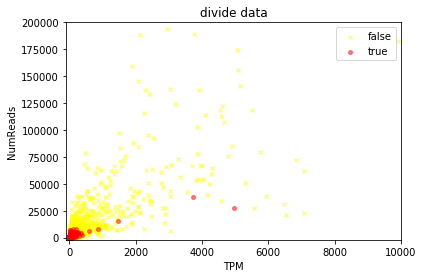

In [52]:
divide_data = plt.figure(1)  
plt.scatter(TPM_false,NumReads_false,marker='x',color='yellow',label='false',s=15,alpha=0.5)
plt.scatter(TPM_true,NumReads_true,marker='o',color='red',label='true',s=15,alpha=0.5)
plt.xlim((-100, 10000))
plt.ylim((-2000, 200000))
plt.legend() # 展示图例
plt.xlabel('TPM') # 给 x 轴添加标签
plt.ylabel('NumReads') # 给 y 轴添加标签
plt.title('divide data') # 添加图形标题
plt.show()

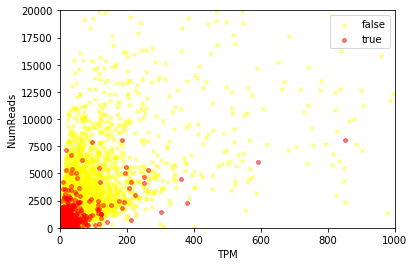

In [53]:
miniscale = plt.figure(2)
plt.xlim((0, 1000))
plt.ylim((0, 20000))
plt.scatter(TPM_false,NumReads_false,marker='x',color='yellow',label='false',s=15,alpha=0.5)
plt.scatter(TPM_true,NumReads_true,marker='o',color='red',label='true',s=15,alpha=0.5)
plt.legend() # 展示图例
plt.xlabel('TPM') # 给 x 轴添加标签
plt.ylabel('NumReads') # 给 y 轴添加标签
plt.show()

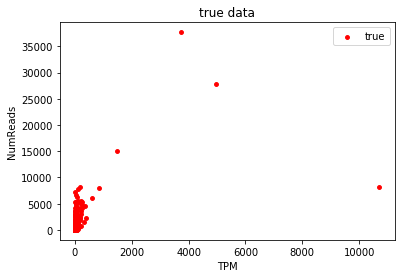

In [45]:
true_data = plt.figure(3)  
plt.scatter(TPM_true,NumReads_true,color='red',label='true',s=15,alpha=1)
plt.legend() # 展示图例
plt.xlabel('TPM') # 给 x 轴添加标签
plt.ylabel('NumReads') # 给 y 轴添加标签
plt.title('true data')
plt.show()

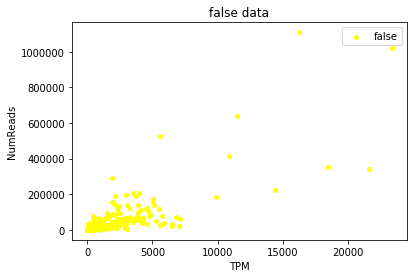

In [46]:
flase_data = plt.figure(4)
plt.scatter(TPM_false,NumReads_false,color='yellow',label='false',s=15,alpha=1)
plt.legend() # 展示图例
plt.xlabel('TPM') # 给 x 轴添加标签
plt.ylabel('NumReads') # 给 y 轴添加标签
plt.title('false data')
plt.show()

# Some Classification Models

In [54]:
data.head(5)

,Name,Length,EffectiveLength,TPM,NumReads,label
0,ENST00000382369,1420,1220.991,1.180968,46.855146,1
1,ENST00000360321,1575,1375.991,0.912080,40.780781,1
2,ENST00000460062,552,353.005,15.124547,173.488438,1
3,ENST00000608066,577,378.005,3.340497,41.031309,1
4,ENST00000246104,3577,3377.991,0.036441,4.000000,1


### prepare the training data

In [60]:
from sklearn.utils import shuffle  

#### Shuffle the data

In [61]:
sfdata = shuffle(data) # make the data random
input_data = sfdata[['Length','EffectiveLength','TPM','NumReads']]
input_label = sfdata['label']

In [165]:
train = int(len(input_data)*9/10)
test = train+1
train_data = input_data[0:train]
train_label = input_label[0:train]
test_data = input_data[test:]
test_label = input_label[test:]

In [361]:
def trans_onehot(labels):
    onehot_labels = []
    for label in labels:
        if label==0:
            onehot_labels.append([0,1])
        else:
            onehot_labels.append([1,0])
    return onehot_labels

In [362]:
train_onehot_label = trans_onehot(train_label)
test_onehot_label = trans_onehot(test_label)

#### Drop some data that TPM==0

In [406]:
dropped_data = data[data.TPM>0]

In [407]:
dropped_sfdata = shuffle(dropped_data)

In [408]:
dropped_input_data = dropped_sfdata[['Length','EffectiveLength','TPM','NumReads']]
dropped_input_label = dropped_sfdata['label']

In [409]:
dropped_train= int(len(dropped_input_data)*9/10)
dropped_test = dropped_train + 1

In [410]:
dropped_train_data = dropped_input_data[0:dropped_train]
dropped_train_label = dropped_input_label[0:dropped_train]
dropped_test_data = dropped_input_data[dropped_test:]
dropped_test_label = dropped_input_label[dropped_test:]

In [411]:
dropped_train_onehot_label = trans_onehot(dropped_train_label)
dropped_test_onehot_label = trans_onehot(dropped_test_label)

In [450]:
def square(x):
    return x**2


def cal_mse(regr,test_label):
    error = (regr-test_label)
    error_sq = error.apply(square)
    mse = error_sq.sum()/len(error)
    return mse

def cal_pred(regr,alpha):
    pred=[]
    for x in regr:
        if x>=alpha:
            pred.append(1)
        else:
            pred.append(0)
    return pred

def cal_accuracy(pred,test_label):
    diff = pred-test_label
    diff=diff.as_matrix()
    diff = diff.tolist()
    right_count = diff.count(0)
#     print(right_count)
    accuracy = right_count/len(diff)
    return accuracy

#################  Unfinished #########################
def cal_unbalance_accuracy(pred,test_label):
    '''  
        Truth      Predict
    TP = T    ->    T
    FN = T  ->      F
    FP = F     ->   T
    TN = F    ->    F
    P = TP/(TP+FP)
    R = TP/(TP+FN)
    TPR = TP/(TP+FN)
    FPR = FP/(TN+FP)
    '''
    diff = pred-test_label
    diff.as_matrix()
    diff = diff.tolist()
    right_count = diff.count(0)
    return 0

### Nerual Network

#### with tensorflow

In [338]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [484]:
# Training Data
train_X = dropped_train_data.as_matrix()
train_Y = dropped_train_label.as_matrix()
train_X = np.reshape(train_X,(len(train_X),4))  
train_Y = np.reshape(train_Y,(len(train_Y),1))  
n_samples = train_X.shape[0]

In [386]:
# train_Y = np.array(train_Y)

In [520]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout

In [525]:
model = Sequential()
model.add(Dense(8, input_shape=(4,)))
model.add(Activation('tanh'))
model.add(Dense(16))
model.add(Activation('tanh'))
model.add(Dense(4))
model.add(Dense(1))
# model.add(Activation('softmax'))

In [526]:
model.compile(optimizer='rmsprop',loss='mse')

In [527]:
model.fit(train_X, train_Y, epochs=100, batch_size=64)

Epoch 1/100
26792/26792 [==============================] - 0s - loss: 0.2847     
Epoch 2/100
26792/26792 [==============================] - 0s - loss: 0.2320     
Epoch 3/100
26792/26792 [==============================] - 0s - loss: 0.2316     
Epoch 4/100
26792/26792 [==============================] - 0s - loss: 0.2303     
Epoch 5/100
26792/26792 [==============================] - 0s - loss: 0.2278     
Epoch 6/100
26792/26792 [==============================] - 0s - loss: 0.2251     
Epoch 7/100
26792/26792 [==============================] - 0s - loss: 0.2200     - ETA: 0s - loss: 
Epoch 8/100
26792/26792 [==============================] - 0s - loss: 0.2099     
Epoch 9/100
26792/26792 [==============================] - 0s - loss: 0.1910     
Epoch 10/100
26792/26792 [==============================] - 0s - loss: 0.1827     
Epoch 11/100
26792/26792 [==============================] - 0s - loss: 0.1822     
Epoch 12/100
26792/26792 [==============================] - 0s - loss: 0.1801 

In [528]:
Test = dropped_test_data.as_matrix()
Test_label = dropped_test_label.as_matrix()

In [530]:
nn_regr = model.predict(Test)

In [532]:
nn_pred = cal_pred(nn_regr,0.5)
nn_pred = cal_pred(nn_regr,0.5)
diff = nn_pred-Test_label
diff = diff.tolist()
right_count = diff.count(0)
nn_accuracy = right_count/len(diff)
print('Nerual Network: accuracy',nn_accuracy)

Nerual Network: accuracy 0.7560483870967742


### Linear Regression 

#### with sklearn

In [159]:
import sklearn

In [162]:
from sklearn.linear_model import LinearRegression

In [421]:
lr = LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

In [422]:
lr.fit(dropped_train_data,dropped_train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [423]:
lr_regr = lr.predict(dropped_test_data)

In [456]:
# pred = [x>0.5 for x in regr]
# lr_alpha = len(data[label==1])/len(data)
lr_alpha = 0.5
lr_pred = cal_pred(lr_regr,alpha)

In [457]:
lr_mse = cal_mse(lr_regr,dropped_test_label)
print("linear_regr: mse=",lr_mse)
lr_accuracy = cal_accuracy(lr_pred,dropped_test_label)
print("linear_regr: accuracy=",lr_accuracy)

linear_regr: mse= 0.24674520923824544
linear_regr: accuracy= 0.5450268817204301


We can see the result of linear regression is not so good. So the model may not be linear, then we will try SVR a nonlinear model to do classification

### SVR

In [204]:
from sklearn.svm import SVR

In [205]:
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(dropped_train_data,dropped_train_label)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [428]:
svr_regr = clf.predict(dropped_test_data)

In [459]:
# alpha = len(dropped_data[label==1])/len(dropped_data)
svr_mse = cal_mse(svr_regr,dropped_test_label)
print('SVR: mse=',svr_mse)
svr_alpha = 0.5
svr_pred = cal_pred(svr_regr,svr_alpha)
svr_accuracy = cal_accuracy(svr_pred,dropped_test_label)
print('SVR: accuracy=',svr_accuracy)

SVR: mse= 0.06162988735258758
SVR: accuracy= 0.9667338709677419


In [460]:
svr_regr_undrop = clf.predict(test_data)
mse_undrop = cal_mse(svr_regr,dropped_test_label)
print('SVR: mse=',mse_undrop)
svr_alpha = 0.5
svr_pred_undrop = cal_pred(svr_regr_undrop,svr_alpha)
svr_accuracy_undrop = cal_accuracy(svr_pred_undrop,test_label)
print('SVR: accuracy=',svr_accuracy_undrop)

SVR: mse= 0.06162988735258758
SVR: accuracy= 0.8892588614393125


In [462]:
from sklearn.externals import joblib

In [467]:
joblib.dump(clf, '../save/clf_svr.pkl')

['../save/clf_svr.pkl']

## Eq_classes.txt
    Eq_classes.txt: list of equivalence classes and their information

In [23]:
file = open(root_path+"eq_classes.txt")
lines = file.readlines()
file.close()

In [24]:
counts_transcript = lines[0]
counts_transcript = int(counts_transcript[:-1])
counts_class = lines[1]
counts_class = int(counts_class[:-1])

In [25]:
lines = lines[2:]

### get the sequence and order of id

In [26]:
seq_id=[]
for id in lines[0:counts_transcript]:
    seq_id.append(id[:-1])

In [27]:
len(seq_id)

93109

In [28]:
seq_id[0]

'ENST00000382410'

In [29]:
seq_id[-1]

'ENST00000361789'

In [30]:
lines = lines[counts_transcript:]

In [31]:
lines[0]

'1\t61539\t385\n'

In [32]:
list_class = []
for line in lines:
    li = line[:-1].split('\t')
    list_class.append(li)

In [33]:
list_class[0]

['1', '61539', '385']

In [34]:
list_class[-1]

['5', '83713', '83714', '83715', '83716', '83717', '128']

In [35]:
list_class_member = []
for x in list_class:
    list_class_member.append(x[1:-1])

In [36]:
list_class_int = []
for class_member in list_class:
    for c
    list_class_int.append(class_member)

SyntaxError: invalid syntax (<ipython-input-36-b793cbf83e8c>, line 3)

In [37]:
list_class = list(list(int(a) for a in b) for b in list_class)

In [38]:
list_class[0]

[1, 61539, 385]

In [54]:
df_labeled_id.head(5)

,Name,label
0,ENST00000382369,1
1,ENST00000360321,1
2,ENST00000460062,1
3,ENST00000608066,1
4,ENST00000246104,1


In [72]:
df_labeled_id = df_labeled_id.set_index('Name')

1

In [76]:
penaty = 0
i=0
for class_member in list_class:
    i = i + 1
#     print(i)
    num = class_member[0]
    count = class_member[-1]
    true_count = 0
    for id in class_member[1:-1]:
        true_count += df_labeled_id.loc[seq_id[id]].label
    penaty += (true_count*(num-true_count))*count/num
#     print(penaty)
    

1
-96.25
2
-108.0
3
-172.35
4
-250.85
5
-399.064285714
6
-399.064285714
7
-399.314285714
8
-399.564285714
9
-400.064285714
10
-400.064285714
11
-547.980952381
12
-548.980952381
13
-558.880952381
14
-559.880952381
15
-559.880952381
16
-561.880952381
17
-596.380952381
18
-596.630952381
19
-599.964285714
20
-689.964285714
21
-690.964285714
22
-696.532467532
23
-699.032467532
24
-1189.03246753
25
-1189.28246753
26
-1189.28246753
27
-1196.28246753
28
-1198.78246753
29
-1215.53246753
30
-1215.61580087
31
-1215.61580087
32
-1261.86580087
33
-1332.36580087
34
-1332.36580087
35
-1335.36580087
36
-1335.4491342
37
-1335.9491342
38
-1336.61580087
39
-1407.86580087
40
-1630.16580087
41
-1630.91580087
42
-1634.91580087
43
-1635.16580087
44
-1645.51580087
45
-1646.43246753
46
-1646.43246753
47
-1691.93246753
48
-1695.53246753
49
-1695.53246753
50
-1696.53246753
51
-1696.53246753
52
-1724.53246753
53
-1742.03246753
54
-1742.1991342
55
-1783.53246753
56
-1784.03246753
57
-1787.78246753
58
-1798.2824675

-93729.555149
867
-93729.555149
868
-93835.805149
869
-93836.2218157
870
-93842.9718157
871
-93850.9718157
872
-93853.2218157
873
-93885.555149
874
-93887.305149
875
-93888.4187854
876
-93888.5021187
877
-93890.7521187
878
-94029.4187854
879
-94150.4187854
880
-94150.9187854
881
-94152.7044997
882
-94153.037833
883
-94155.287833
884
-94156.537833
885
-94165.8711663
886
-94168.1211663
887
-94168.8711663
888
-94169.4544997
889
-94367.787833
890
-94372.287833
891
-94372.287833
892
-94375.287833
893
-94375.787833
894
-94375.787833
895
-94375.9544997
896
-94376.9544997
897
-94378.2044997
898
-94378.2044997
899
-94393.2044997
900
-94393.2044997
901
-94394.9544997
902
-94395.9544997
903
-94396.2044997
904
-94396.2044997
905
-94396.2044997
906
-94396.2044997
907
-94417.7044997
908
-94418.2044997
909
-94418.2044997
910
-94418.9544997
911
-94418.9544997
912
-94428.787833
913
-94444.787833
914
-94458.037833
915
-94464.337833
916
-94480.087833
917
-94480.087833
918
-94643.337833
919
-94644.587833


1607
-144251.215616
1608
-144592.548949
1609
-144601.298949
1610
-144619.298949
1611
-144619.298949
1612
-144621.048949
1613
-144621.548949
1614
-144626.465616
1615
-144982.132283
1616
-144982.132283
1617
-144983.632283
1618
-144987.582283
1619
-144990.796569
1620
-144994.796569
1621
-144994.796569
1622
-144995.396569
1623
-145032.063235
1624
-145032.063235
1625
-145040.563235
1626
-145162.813235
1627
-145162.813235
1628
-145165.479902
1629
-145166.729902
1630
-145168.979902
1631
-145169.646569
1632
-145264.896569
1633
-145309.146569
1634
-145309.146569
1635
-145329.396569
1636
-145333.396569
1637
-145346.063235
1638
-145354.229902
1639
-145409.587045
1640
-147796.087045
1641
-147797.587045
1642
-147800.087045
1643
-147806.587045
1644
-147806.587045
1645
-147807.087045
1646
-147807.087045
1647
-147809.087045
1648
-147809.337045
1649
-147814.337045
1650
-147816.337045
1651
-147821.087045
1652
-147825.087045
1653
-147834.587045
1654
-147834.587045
1655
-147834.670378
1656
-147842.706092


-187357.991152
2353
-187360.691152
2354
-187361.591152
2355
-187372.841152
2356
-187386.033459
2357
-187388.755682
2358
-187389.755682
2359
-187389.755682
2360
-187391.672348
2361
-187393.005682
2362
-187393.005682
2363
-187393.255682
2364
-187396.082605
2365
-187450.532605
2366
-187539.532605
2367
-187592.782605
2368
-187592.949271
2369
-187593.399271
2370
-187593.399271
2371
-187596.649271
2372
-187596.649271
2373
-187598.549271
2374
-187669.549271
2375
-187699.382605
2376
-187701.382605
2377
-187702.632605
2378
-187703.132605
2379
-187720.382605
2380
-187720.465938
2381
-187720.715938
2382
-187722.215938
2383
-187724.465938
2384
-187733.215938
2385
-187736.215938
2386
-187764.382605
2387
-187767.882605
2388
-187771.882605
2389
-187789.382605
2390
-187794.632605
2391
-187844.382605
2392
-187941.882605
2393
-187943.215938
2394
-187975.03412
2395
-187975.03412
2396
-188211.03412
2397
-188211.03412
2398
-188215.53412
2399
-188215.53412
2400
-188242.78412
2401
-188300.53412
2402
-188315.

-242253.260905
3102
-242253.260905
3103
-242253.344238
3104
-242253.344238
3105
-242253.344238
3106
-242272.344238
3107
-242306.094238
3108
-242321.06646
3109
-242473.399794
3110
-242532.649794
3111
-242554.649794
3112
-242566.483127
3113
-242566.983127
3114
-242820.233127
3115
-242820.683127
3116
-242835.349794
3117
-242837.349794
3118
-242848.599794
3119
-242849.26646
3120
-242849.26646
3121
-243040.51646
3122
-243053.51646
3123
-243100.26646
3124
-243101.26646
3125
-243128.26646
3126
-243161.599794
3127
-243167.349794
3128
-243178.849794
3129
-243179.099794
3130
-243179.849794
3131
-243189.849794
3132
-243201.849794
3133
-243202.742651
3134
-243209.825984
3135
-243219.825984
3136
-243222.325984
3137
-243226.325984
3138
-243228.159318
3139
-243229.659318
3140
-243229.659318
3141
-243230.909318
3142
-243231.159318
3143
-243232.159318
3144
-243309.159318
3145
-243310.909318
3146
-243310.992651
3147
-243310.992651
3148
-243310.992651
3149
-243310.992651
3150
-243310.992651
3151
-243318.

-302489.36957
3617
-302494.36957
3618
-302525.86957
3619
-302531.202903
3620
-302531.202903
3621
-302533.036236
3622
-302539.286236
3623
-302539.286236
3624
-302543.286236
3625
-302545.536236
3626
-302625.391499
3627
-302625.391499
3628
-302627.141499
3629
-302628.641499
3630
-302628.808166
3631
-302629.308166
3632
-302633.058166
3633
-302642.308166
3634
-302661.308166
3635
-302669.558166
3636
-302670.558166
3637
-302679.308166
3638
-302749.308166
3639
-302757.808166
3640
-302787.808166
3641
-302789.308166
3642
-302790.058166
3643
-302790.058166
3644
-302792.780388
3645
-302792.780388
3646
-302792.780388
3647
-302821.280388
3648
-302958.530388
3649
-302962.530388
3650
-302962.780388
3651
-302962.780388
3652
-302963.780388
3653
-302964.280388
3654
-302964.280388
3655
-303525.430388
3656
-303525.680388
3657
-303537.847055
3658
-303538.097055
3659
-303541.680388
3660
-303548.680388
3661
-303617.680388
3662
-303696.180388
3663
-304242.180388
3664
-304242.280388
3665
-304277.380388
3666
-30

4349
-357365.587042
4350
-357939.694185
4351
-357939.944185
4352
-357975.444185
4353
-358032.194185
4354
-358032.444185
4355
-358033.944185
4356
-358034.944185
4357
-358035.494185
4358
-358035.744185
4359
-358215.494185
4360
-358215.744185
4361
-358219.244185
4362
-358223.244185
4363
-358239.744185
4364
-358398.494185
4365
-358398.494185
4366
-358399.577518
4367
-358684.077518
4368
-358684.244185
4369
-358708.744185
4370
-358712.244185
4371
-358808.672756
4372
-358811.422756
4373
-358814.122756
4374
-358831.372756
4375
-359151.372756
4376
-359152.372756
4377
-359176.789423
4378
-359176.789423
4379
-359176.789423
4380
-359176.789423
4381
-359214.039423
4382
-359214.039423
4383
-359224.789423
4384
-359225.289423
4385
-359227.789423
4386
-359228.089423
4387
-359230.998514
4388
-359253.248514
4389
-359256.748514
4390
-359256.798514
4391
-359316.798514
4392
-359328.691371
4393
-359329.191371
4394
-359330.858038
4395
-359438.108038
4396
-359438.108038
4397
-359540.108038
4398
-359540.108038


-419355.162608
5013
-419379.912608
5014
-419379.912608
5015
-419410.912608
5016
-419412.262608
5017
-419412.312608
5018
-419628.384036
5019
-419628.384036
5020
-419631.634036
5021
-419639.991179
5022
-419645.991179
5023
-419662.491179
5024
-419773.157846
5025
-419773.157846
5026
-419773.407846
5027
-419774.741179
5028
-420084.741179
5029
-420231.741179
5030
-420231.741179
5031
-420231.741179
5032
-420234.491179
5033
-420313.241179
5034
-420654.574512
5035
-420762.157846
5036
-420792.907846
5037
-420802.435623
5038
-421480.835623
5039
-421491.085623
5040
-421495.335623
5041
-421498.335623
5042
-421499.385623
5043
-421512.435623
5044
-421513.785623
5045
-421514.285623
5046
-421524.285623
5047
-421556.035623
5048
-421556.035623
5049
-421556.935623
5050
-421561.935623
5051
-421569.10229
5052
-421580.60229
5053
-421580.60229
5054
-421580.60229
5055
-421581.60229
5056
-421690.35229
5057
-421749.60229
5058
-421823.72729
5059
-421851.72729
5060
-421851.72729
5061
-421851.77729
5062
-421852.027

6071
-527558.606188
6072
-527570.606188
6073
-527571.272854
6074
-527790.022854
6075
-527819.022854
6076
-527840.522854
6077
-527840.522854
6078
-527840.606188
6079
-527841.106188
6080
-527841.522854
6081
-527846.522854
6082
-527865.022854
6083
-527865.022854
6084
-527907.522854
6085
-527921.808569
6086
-527926.391902
6087
-527929.341902
6088
-528014.841902
6089
-528015.091902
6090
-528016.877616
6091
-528818.777616
6092
-528819.527616
6093
-528820.194283
6094
-528820.194283
6095
-528820.644283
6096
-528820.644283
6097
-528820.644283
6098
-528820.644283
6099
-528825.644283
6100
-528930.310949
6101
-528933.310949
6102
-528937.810949
6103
-528941.810949
6104
-528946.310949
6105
-529003.910949
6106
-529004.410949
6107
-529004.660949
6108
-529004.910949
6109
-529069.910949
6110
-529070.160949
6111
-529076.160949
6112
-529503.910949
6113
-529521.010949
6114
-529523.010949
6115
-529600.594283
6116
-529749.844283
6117
-529749.927616
6118
-529752.927616
6119
-529753.927616
6120
-529783.427616


6600
-564061.592922
6601
-564061.759589
6602
-564062.009589
6603
-564063.209589
6604
-564203.459589
6605
-564203.459589
6606
-564203.459589
6607
-564203.459589
6608
-564205.017281
6609
-564205.017281
6610
-564376.017281
6611
-564376.100614
6612
-564376.100614
6613
-564418.100614
6614
-564418.100614
6615
-564418.600614
6616
-564422.600614
6617
-564453.200614
6618
-565016.700614
6619
-565017.033948
6620
-565055.283948
6621
-565060.283948
6622
-565083.233948
6623
-565083.483948
6624
-565085.733948
6625
-565085.733948
6626
-565115.802129
6627
-565430.552129
6628
-565430.552129
6629
-565901.052129
6630
-565901.502129
6631
-565905.502129
6632
-565922.835463
6633
-565929.835463
6634
-565929.835463
6635
-565932.085463
6636
-565973.085463
6637
-565976.685463
6638
-565976.935463
6639
-565995.352129
6640
-565995.602129
6641
-566127.602129
6642
-566555.102129
6643
-566555.185463
6644
-566569.185463
6645
-566631.935463
6646
-566632.102129
6647
-566633.602129
6648
-566672.602129
6649
-566673.352129


-690187.590105
7117
-690188.590105
7118
-690884.590105
7119
-690887.090105
7120
-690887.090105
7121
-690948.590105
7122
-690950.840105
7123
-690950.840105
7124
-690970.340105
7125
-690970.340105
7126
-690970.490105
7127
-691013.073438
7128
-691038.934549
7129
-691040.017883
7130
-691041.517883
7131
-691143.601216
7132
-691146.279788
7133
-691146.529788
7134
-691146.613121
7135
-691159.196454
7136
-691159.279788
7137
-691193.279788
7138
-691329.029788
7139
-691468.029788
7140
-691470.529788
7141
-691471.446454
7142
-691472.696454
7143
-691473.363121
7144
-691474.255978
7145
-691475.755978
7146
-691479.505978
7147
-691479.755978
7148
-691479.755978
7149
-691492.130978
7150
-691534.880978
7151
-691538.321454
7152
-691538.321454
7153
-691538.821454
7154
-691598.321454
7155
-691599.071454
7156
-691600.821454
7157
-691600.821454
7158
-691603.488121
7159
-691669.760848
7160
-691676.760848
7161
-691677.703156
7162
-691693.303156
7163
-691696.025378
7164
-691814.698455
7165
-692268.269884
7166


7643
-752737.216798
7644
-752748.466798
7645
-752760.101413
7646
-752783.101413
7647
-753198.101413
7648
-753417.169595
7649
-756238.169595
7650
-756239.455309
7651
-756307.705309
7652
-756308.955309
7653
-756524.055309
7654
-756538.055309
7655
-756539.055309
7656
-756547.091024
7657
-756547.091024
7658
-756547.541024
7659
-756547.791024
7660
-756547.791024
7661
-756547.791024
7662
-756641.95769
7663
-756657.70769
7664
-756658.70769
7665
-756660.541024
7666
-756663.041024
7667
-756663.291024
7668
-756663.291024
7669
-756672.541024
7670
-756673.291024
7671
-756760.041024
7672
-756768.041024
7673
-756769.041024
7674
-756772.041024
7675
-756774.041024
7676
-756831.374357
7677
-756831.374357
7678
-756843.374357
7679
-757273.624357
7680
-757273.874357
7681
-757340.70769
7682
-757512.20769
7683
-759430.95769
7684
-759640.45769
7685
-759645.124357
7686
-759659.926988
7687
-759668.426988
7688
-759822.676988
7689
-759823.593655
7690
-759833.676988
7691
-759838.176988
7692
-759903.426988
7693
-7

-832955.928401
8348
-835019.321258
8349
-835019.321258
8350
-835019.571258
8351
-835019.571258
8352
-835113.571258
8353
-835138.642687
8354
-835151.892687
8355
-835152.342687
8356
-835156.842687
8357
-835158.092687
8358
-835158.128401
8359
-835158.128401
8360
-835158.128401
8361
-835179.906179
8362
-835186.711734
8363
-835359.961734
8364
-835399.961734
8365
-835730.961734
8366
-835730.961734
8367
-835731.211734
8368
-835752.545068
8369
-835754.045068
8370
-835755.545068
8371
-835756.878401
8372
-835757.378401
8373
-835807.628401
8374
-835821.128401
8375
-835823.378401
8376
-835879.878401
8377
-835881.478401
8378
-835885.77602
8379
-835893.27602
8380
-835904.47602
8381
-835952.62602
8382
-835964.12602
8383
-835964.12602
8384
-835974.25102
8385
-835974.917687
8386
-835975.667687
8387
-835980.167687
8388
-835980.167687
8389
-836173.917687
8390
-836173.917687
8391
-836356.060544
8392
-836356.060544
8393
-836361.72721
8394
-836515.32721
8395
-836515.77721
8396
-836563.27721
8397
-836563.777

-882188.516916
9098
-882191.516916
9099
-882192.016916
9100
-882193.516916
9101
-882193.683582
9102
-882393.231201
9103
-882393.981201
9104
-882394.031201
9105
-882394.281201
9106
-882464.781201
9107
-883360.031201
9108
-883362.531201
9109
-883364.531201
9110
-883366.031201
9111
-883399.531201
9112
-883400.281201
9113
-883409.114535
9114
-883411.114535
9115
-883411.364535
9116
-883411.364535
9117
-883412.114535
9118
-883423.614535
9119
-883424.614535
9120
-883443.364535
9121
-883570.364535
9122
-883570.864535
9123
-883628.614535
9124
-883651.864535
9125
-883658.114535
9126
-883661.714535
9127
-883699.714535
9128
-883699.964535
9129
-883704.464535
9130
-883717.131201
9131
-883718.131201
9132
-883815.714535
9133
-883815.714535
9134
-883816.214535
9135
-883816.589535
9136
-883817.839535
9137
-883820.339535
9138
-883820.339535
9139
-883821.006201
9140
-883839.756201
9141
-883839.756201
9142
-883842.506201
9143
-883844.006201
9144
-883845.006201
9145
-883847.506201
9146
-883847.506201
9147


-934203.935767
9703
-934270.310767
9704
-934463.360767
9705
-934463.360767
9706
-934470.110767
9707
-934509.860767
9708
-934509.860767
9709
-934519.860767
9710
-934520.860767
9711
-934530.860767
9712
-934547.110767
9713
-934547.360767
9714
-934547.444101
9715
-934547.444101
9716
-934547.444101
9717
-934547.694101
9718
-934547.944101
9719
-934549.544101
9720
-934577.044101
9721
-934670.794101
9722
-934695.294101
9723
-934695.544101
9724
-934711.044101
9725
-934715.794101
9726
-934883.419101
9727
-934884.419101
9728
-934884.419101
9729
-934929.669101
9730
-934970.085767
9731
-935175.835767
9732
-935251.335767
9733
-935252.835767
9734
-935255.919101
9735
-935310.669101
9736
-936045.169101
9737
-936059.669101
9738
-936059.669101
9739
-936074.419101
9740
-936221.419101
9741
-936221.419101
9742
-936221.502434
9743
-936235.96672
9744
-936236.96672
9745
-936272.96672
9746
-936274.21672
9747
-936274.46672
9748
-936278.46672
9749
-936594.71672
9750
-936597.21672
9751
-936597.633387
9752
-936597.

-982805.557627
10348
-982805.557627
10349
-982805.557627
10350
-982816.271912
10351
-982828.021912
10352
-982836.771912
10353
-982837.021912
10354
-982849.271912
10355
-982850.343341
10356
-982863.343341
10357
-982863.426674
10358
-982863.426674
10359
-982864.093341
10360
-983065.093341
10361
-983172.343341
10362
-983172.593341
10363
-984033.593341
10364
-984033.593341
10365
-984034.043341
10366
-984046.293341
10367
-984358.043341
10368
-984371.793341
10369
-984374.493341
10370
-984376.993341
10371
-984399.943341
10372
-984811.443341
10373
-984813.443341
10374
-984816.943341
10375
-984817.193341
10376
-984817.193341
10377
-984860.776674
10378
-984875.026674
10379
-986868.626674
10380
-986869.376674
10381
-986870.960008
10382
-986886.460008
10383
-986897.960008
10384
-986901.960008
10385
-986924.460008
10386
-986941.460008
10387
-986947.460008
10388
-986949.210008
10389
-986949.210008
10390
-986950.810008
10391
-986952.560008
10392
-987276.560008
10393
-987318.024293
10394
-987420.70286

10905
-1013820.22662
10906
-1013837.22662
10907
-1013837.30995
10908
-1013837.30995
10909
-1013875.05995
10910
-1013875.05995
10911
-1013959.55995
10912
-1013988.22662
10913
-1013991.72662
10914
-1013991.72662
10915
-1013991.97662
10916
-1014016.22662
10917
-1014016.22662
10918
-1014158.22662
10919
-1014192.64329
10920
-1014193.89329
10921
-1014198.35757
10922
-1014199.35757
10923
-1014255.35757
10924
-1014519.60757
10925
-1014629.85757
10926
-1014638.15757
10927
-1014654.40757
10928
-1014922.15757
10929
-1014923.05757
10930
-1014924.41868
10931
-1014924.66868
10932
-1014926.41868
10933
-1014926.91868
10934
-1014973.41868
10935
-1014974.16868
10936
-1014974.41868
10937
-1014975.16868
10938
-1016313.91868
10939
-1016484.66868
10940
-1016484.91868
10941
-1016484.91868
10942
-1016676.41868
10943
-1016704.16868
10944
-1016706.16868
10945
-1018727.91868
10946
-1018755.41868
10947
-1018866.41868
10948
-1018885.16868
10949
-1018887.66868
10950
-1018892.25202
10951
-1018892.25202
10952
-101889

-1036095.26461
11377
-1036112.01461
11378
-1036112.26461
11379
-1036114.18127
11380
-1036114.18127
11381
-1036316.68127
11382
-1036317.68127
11383
-1036740.34794
11384
-1036749.34794
11385
-1036750.84794
11386
-1036752.84794
11387
-1036752.84794
11388
-1036760.09794
11389
-1036760.09794
11390
-1036763.76461
11391
-1036901.76461
11392
-1037022.76461
11393
-1037023.26461
11394
-1037023.34794
11395
-1037023.34794
11396
-1037023.84794
11397
-1037042.59794
11398
-1037071.09794
11399
-1037082.29794
11400
-1037153.29794
11401
-1037162.54794
11402
-1037163.54794
11403
-1037213.54794
11404
-1037214.89794
11405
-1037219.14794
11406
-1037236.64794
11407
-1037237.64794
11408
-1037238.39794
11409
-1037251.64794
11410
-1037251.64794
11411
-1037251.64794
11412
-1037251.64794
11413
-1037344.20349
11414
-1037344.45349
11415
-1037344.45349
11416
-1037344.70349
11417
-1037347.20349
11418
-1037347.20349
11419
-1037816.70349
11420
-1037816.95349
11421
-1037818.07849
11422
-1037818.32849
11423
-1037882.8284

-1079868.775
11870
-1080244.44167
11871
-1080252.025
11872
-1080252.19167
11873
-1080351.69167
11874
-1080399.0131
11875
-1080401.7631
11876
-1080402.92977
11877
-1080402.92977
11878
-1080407.92977
11879
-1080407.92977
11880
-1080438.17977
11881
-1080438.42977
11882
-1080448.67977
11883
-1080451.5131
11884
-1082983.7631
11885
-1082984.0131
11886
-1082988.0131
11887
-1083192.7631
11888
-1083193.7631
11889
-1083193.84643
11890
-1083205.84643
11891
-1083207.09643
11892
-1083207.99643
11893
-1083208.99643
11894
-1083208.99643
11895
-1083209.74643
11896
-1083211.07977
11897
-1083229.82977
11898
-1083408.13532
11899
-1083410.13532
11900
-1084527.23532
11901
-1084559.98532
11902
-1084571.73532
11903
-1084583.23532
11904
-1084600.98532
11905
-1084613.90199
11906
-1084615.15199
11907
-1084624.48532
11908
-1084624.48532
11909
-1084642.98532
11910
-1084657.48532
11911
-1084657.73532
11912
-1084657.81865
11913
-1084660.15199
11914
-1084665.98532
11915
-1084666.73532
11916
-1084668.98532
11917
-108

12380
-1138016.90794
12381
-1138037.40794
12382
-1138046.15794
12383
-1138048.65794
12384
-1138049.40794
12385
-1138058.07461
12386
-1138436.74128
12387
-1142379.49128
12388
-1142488.39128
12389
-1142489.14128
12390
-1142491.14128
12391
-1142491.14128
12392
-1142642.39128
12393
-1142780.39128
12394
-1142787.14128
12395
-1142795.14128
12396
-1142800.14128
12397
-1142808.14128
12398
-1142812.14128
12399
-1142812.14128
12400
-1142818.64128
12401
-1142818.97461
12402
-1142843.72461
12403
-1142846.97461
12404
-1142885.47461
12405
-1142938.57461
12406
-1142954.49128
12407
-1142957.06271
12408
-1142992.06271
12409
-1142994.31271
12410
-1142996.31271
12411
-1142996.47937
12412
-1143036.72937
12413
-1143106.22937
12414
-1143109.97937
12415
-1143109.97937
12416
-1143263.72937
12417
-1143509.72937
12418
-1143509.72937
12419
-1143510.72937
12420
-1143511.39604
12421
-1143523.22937
12422
-1143525.47937
12423
-1143525.47937
12424
-1143530.22937
12425
-1143561.72937
12426
-1143575.22937
12427
-114357

13098
-1181844.95525
13099
-1181875.20525
13100
-1182485.95525
13101
-1182486.70525
13102
-1182489.95525
13103
-1182490.95525
13104
-1182520.95525
13105
-1182528.95525
13106
-1182567.20525
13107
-1182568.70525
13108
-1182690.70525
13109
-1182690.70525
13110
-1182887.70525
13111
-1182892.12192
13112
-1182895.12192
13113
-1182895.12192
13114
-1182906.37192
13115
-1182906.37192
13116
-1182906.37192
13117
-1182919.22906
13118
-1182920.89572
13119
-1182928.64572
13120
-1182973.64572
13121
-1182978.44572
13122
-1183141.11239
13123
-1183149.86239
13124
-1183150.52906
13125
-1183446.24334
13126
-1183446.24334
13127
-1183446.49334
13128
-1183446.49334
13129
-1183446.81477
13130
-1183711.73144
13131
-1183744.73144
13132
-1183744.73144
13133
-1183750.73144
13134
-1183756.36477
13135
-1183756.71093
13136
-1183756.87759
13137
-1183762.12759
13138
-1183770.12759
13139
-1183777.62759
13140
-1183791.79426
13141
-1183792.12759
13142
-1183792.12759
13143
-1183793.71093
13144
-1183794.46093
13145
-118379

-1278381.29679
13826
-1278381.29679
13827
-1278382.54679
13828
-1278393.54679
13829
-1278479.94679
13830
-1279497.44679
13831
-1279502.94679
13832
-1279503.19679
13833
-1279503.19679
13834
-1279508.33965
13835
-1279701.51822
13836
-1279702.18489
13837
-1279703.53489
13838
-1279704.53489
13839
-1279706.53489
13840
-1279707.28489
13841
-1279746.03489
13842
-1279746.03489
13843
-1279746.53489
13844
-1279746.53489
13845
-1279746.98489
13846
-1280231.48489
13847
-1280247.98489
13848
-1280248.43489
13849
-1280248.43489
13850
-1280249.93489
13851
-1280251.26822
13852
-1280252.76822
13853
-1280258.51822
13854
-1280258.76822
13855
-1280411.76822
13856
-1280635.76822
13857
-1280635.76822
13858
-1280683.68489
13859
-1280721.68489
13860
-1280721.68489
13861
-1280825.18489
13862
-1280825.18489
13863
-1280825.18489
13864
-1280825.93489
13865
-1280856.30989
13866
-1280862.70989
13867
-1280893.70989
13868
-1280893.70989
13869
-1280895.20989
13870
-1280939.45989
13871
-1282004.15989
13872
-1282006.8384

14346
-1317548.28026
14347
-1317552.78026
14348
-1317560.78026
14349
-1317561.03026
14350
-1317561.99455
14351
-1317594.49455
14352
-1317611.24455
14353
-1317611.32788
14354
-1317613.07788
14355
-1317613.07788
14356
-1318485.39931
14357
-1318494.89931
14358
-1318495.89931
14359
-1318732.73264
14360
-1318964.98264
14361
-1318974.98264
14362
-1318976.48264
14363
-1319096.23264
14364
-1319096.39931
14365
-1319096.39931
14366
-1319096.74931
14367
-1319416.24931
14368
-1319418.33264
14369
-1320056.33264
14370
-1320209.08264
14371
-1320226.41598
14372
-1320230.91598
14373
-1320618.91598
14374
-1320619.01598
14375
-1320784.51598
14376
-1320903.18264
14377
-1320903.18264
14378
-1320976.93264
14379
-1320981.18264
14380
-1320981.18264
14381
-1320983.18264
14382
-1320984.08264
14383
-1320990.04693
14384
-1321166.29693
14385
-1321173.29693
14386
-1321173.54693
14387
-1321183.54693
14388
-1322080.04693
14389
-1322080.04693
14390
-1322084.79693
14391
-1322084.79693
14392
-1322088.04693
14393
-132209

-1461370.06249
15099
-1461482.06249
15100
-1461486.06249
15101
-1461488.81249
15102
-1462204.31249
15103
-1462208.81249
15104
-1462209.31249
15105
-1462299.31249
15106
-1462305.16249
15107
-1462330.41249
15108
-1462333.91249
15109
-1462479.91249
15110
-1462480.41249
15111
-1462483.91249
15112
-1462486.91249
15113
-1463000.41249
15114
-1463000.41249
15115
-1463005.36249
15116
-1463030.11249
15117
-1463032.36249
15118
-1463032.52915
15119
-1463061.02915
15120
-1463069.57915
15121
-1463130.37915
15122
-1463146.12915
15123
-1463173.32915
15124
-1463175.32915
15125
-1463175.32915
15126
-1463219.57915
15127
-1463227.57915
15128
-1463332.07915
15129
-1463665.07915
15130
-1463665.82915
15131
-1463674.82915
15132
-1463689.22915
15133
-1463722.22915
15134
-1463729.22915
15135
-1463729.22915
15136
-1463792.47915
15137
-1463799.47915
15138
-1463812.81249
15139
-1463854.56249
15140
-1463985.89582
15141
-1464004.31249
15142
-1464005.81249
15143
-1464023.81249
15144
-1464029.56249
15145
-1464030.0624

-1501807.49956
15845
-1501807.99956
15846
-1502082.49956
15847
-1502082.49956
15848
-1502101.16623
15849
-1502765.41623
15850
-1502869.16623
15851
-1502869.8329
15852
-1502870.3329
15853
-1502870.91623
15854
-1502875.41623
15855
-1502951.66623
15856
-1502951.74956
15857
-1502955.74956
15858
-1502970.3329
15859
-1502977.5829
15860
-1502977.6454
15861
-1503268.55449
15862
-1503268.72115
15863
-1503273.67115
15864
-1503278.67115
15865
-1503279.17115
15866
-1503290.83782
15867
-1503301.50449
15868
-1503311.00449
15869
-1503311.75449
15870
-1503313.25449
15871
-1503315.50449
15872
-1503316.25449
15873
-1503537.50449
15874
-1503563.37949
15875
-1503672.37949
15876
-1503735.37949
15877
-1503746.87949
15878
-1503749.37949
15879
-1503751.37949
15880
-1503753.87949
15881
-1503755.12949
15882
-1503813.62949
15883
-1503813.62949
15884
-1503822.12949
15885
-1503836.12949
15886
-1503840.21282
15887
-1503851.21282
15888
-1503851.62949
15889
-1503855.62949
15890
-1503855.62949
15891
-1503856.37949
158

16351
-1544367.23601
16352
-1544367.23601
16353
-1544408.56934
16354
-1544595.76934
16355
-1544595.93601
16356
-1544596.68601
16357
-1544615.43601
16358
-1544864.43601
16359
-1544918.43601
16360
-1544918.43601
16361
-1544918.43601
16362
-1544918.43601
16363
-1544919.68601
16364
-1544924.18601
16365
-1544964.68601
16366
-1544965.35267
16367
-1546617.60267
16368
-1546643.60267
16369
-1546661.60267
16370
-1546664.85267
16371
-1549292.40267
16372
-1549302.65267
16373
-1549342.15267
16374
-1549402.65267
16375
-1549402.90267
16376
-1549403.15267
16377
-1549405.85267
16378
-1549422.72767
16379
-1549423.97767
16380
-1549426.07767
16381
-1549426.82767
16382
-1549460.82767
16383
-1549463.99434
16384
-1549468.45863
16385
-1549506.25863
16386
-1549506.50863
16387
-1549510.50863
16388
-1549510.59196
16389
-1549515.09196
16390
-1549546.59196
16391
-1549552.21696
16392
-1549552.30029
16393
-1549562.71696
16394
-1549565.21696
16395
-1549573.21696
16396
-1549650.46696
16397
-1549651.36696
16398
-154977

17098
-1606803.78406
17099
-1606807.15906
17100
-1606807.15906
17101
-1606855.20906
17102
-1606859.80906
17103
-1606859.80906
17104
-1606861.41621
17105
-1606864.66621
17106
-1606873.16621
17107
-1606919.66621
17108
-1606922.41621
17109
-1606923.91621
17110
-1606923.91621
17111
-1606926.58287
17112
-1607068.33287
17113
-1607068.49954
17114
-1607110.74954
17115
-1607110.83287
17116
-1607174.33287
17117
-1607446.83287
17118
-1607446.83287
17119
-1607447.08287
17120
-1607457.08287
17121
-1607492.08287
17122
-1607549.08287
17123
-1607648.58287
17124
-1607686.08287
17125
-1607686.08287
17126
-1607686.08287
17127
-1607816.58287
17128
-1607847.18287
17129
-1607847.68287
17130
-1607881.88287
17131
-1607882.88287
17132
-1607885.58287
17133
-1607892.24954
17134
-1607895.99954
17135
-1607896.08287
17136
-1607921.58287
17137
-1607956.48672
17138
-1607973.73672
17139
-1608078.36172
17140
-1608078.81172
17141
-1608082.81172
17142
-1608095.81172
17143
-1608097.56172
17144
-1608100.06172
17145
-160810

-1652305.80278
17844
-1652333.13611
17845
-1652456.88611
17846
-1652457.71944
17847
-1652458.71944
17848
-1652487.30278
17849
-1652492.30278
17850
-1652502.58849
17851
-1652666.58849
17852
-1652669.28849
17853
-1652703.78849
17854
-1652704.03849
17855
-1652720.28849
17856
-1652722.07421
17857
-1652723.07421
17858
-1652735.57421
17859
-1652735.57421
17860
-1652749.57421
17861
-1652758.57421
17862
-1652763.07421
17863
-1652772.15754
17864
-1652839.65754
17865
-1652879.40754
17866
-1652907.15754
17867
-1652931.15754
17868
-1652931.15754
17869
-1652941.57421
17870
-1652999.57421
17871
-1652999.57421
17872
-1652999.82421
17873
-1653016.57421
17874
-1653033.15754
17875
-1653033.65754
17876
-1653039.90754
17877
-1653098.40754
17878
-1653098.40754
17879
-1653108.90754
17880
-1653119.40754
17881
-1653119.40754
17882
-1653125.40754
17883
-1653262.20754
17884
-1653267.45754
17885
-1653268.95754
17886
-1653269.45754
17887
-1653270.20754
17888
-1653270.20754
17889
-1653285.95754
17890
-1653285.9575

-1726507.17312
18594
-1726536.00645
18595
-1726549.75645
18596
-1726549.83979
18597
-1726551.83979
18598
-1726552.58979
18599
-1726552.83979
18600
-1726552.92312
18601
-1726553.25645
18602
-1726596.00645
18603
-1726596.50645
18604
-1726620.00645
18605
-1726747.02918
18606
-1726747.02918
18607
-1726753.94585
18608
-1726754.69585
18609
-1726754.74585
18610
-1726754.74585
18611
-1726757.49585
18612
-1726778.16251
18613
-1726778.16251
18614
-1727289.66251
18615
-1727289.66251
18616
-1727290.91251
18617
-1727291.41251
18618
-1727291.66251
18619
-1727305.02615
18620
-1727306.19282
18621
-1727308.19282
18622
-1727338.19282
18623
-1727338.27615
18624
-1727338.27615
18625
-1727409.52615
18626
-1727425.77615
18627
-1728359.02615
18628
-1728369.63329
18629
-1728373.79996
18630
-1728374.04996
18631
-1728374.04996
18632
-1728374.04996
18633
-1728376.29996
18634
-1728376.84996
18635
-1728490.34996
18636
-1728520.34996
18637
-1728521.59996
18638
-1728526.09996
18639
-1728579.84996
18640
-1728580.3499

19159
-1755847.42478
19160
-1755847.67478
19161
-1755853.17478
19162
-1755915.67478
19163
-1755927.17478
19164
-1755934.17478
19165
-1755934.17478
19166
-1755934.92478
19167
-1755934.92478
19168
-1755935.17478
19169
-1755935.92478
19170
-1756133.67478
19171
-1756140.00812
19172
-1756141.00812
19173
-1756141.00812
19174
-1756141.25812
19175
-1756142.75812
19176
-1756149.50812
19177
-1756168.42478
19178
-1756169.17478
19179
-1756193.17478
19180
-1756201.17478
19181
-1756201.17478
19182
-1756201.34145
19183
-1756211.34145
19184
-1756218.70509
19185
-1756219.28842
19186
-1756228.88842
19187
-1756472.63842
19188
-1756566.63842
19189
-1756567.63842
19190
-1756567.63842
19191
-1756571.63842
19192
-1756572.63842
19193
-1756693.63842
19194
-1756693.63842
19195
-1756695.13842
19196
-1756695.13842
19197
-1756724.38842
19198
-1756724.38842
19199
-1756724.38842
19200
-1756724.38842
19201
-1756733.80509
19202
-1756733.80509
19203
-1756733.88842
19204
-1756736.88842
19205
-1756764.78842
19206
-175680

19844
-1936769.29237
19845
-1936780.12571
19846
-1936782.62571
19847
-1936897.62571
19848
-1936898.87571
19849
-1936904.87571
19850
-1937058.12571
19851
-1937060.37571
19852
-1937061.87571
19853
-1937061.87571
19854
-1937115.62571
19855
-1937115.87571
19856
-1937140.87571
19857
-1937140.87571
19858
-1937142.62571
19859
-1937648.95904
19860
-1937794.30904
19861
-1937802.97571
19862
-1937803.22571
19863
-1937836.72571
19864
-1937836.72571
19865
-1937857.30904
19866
-1937925.05904
19867
-1937972.38047
19868
-1937972.88047
19869
-1937982.63047
19870
-1938066.63047
19871
-1938377.88047
19872
-1938418.85269
19873
-1938418.85269
19874
-1938420.85269
19875
-1938426.35269
19876
-1938993.10269
19877
-1939037.10269
19878
-1939167.60269
19879
-1939200.10269
19880
-1939234.10269
19881
-1939234.10269
19882
-1939254.35269
19883
-1939254.35269
19884
-1939254.35269
19885
-1939255.35269
19886
-1939276.78126
19887
-1943653.28126
19888
-1943653.36459
19889
-1943787.54317
19890
-1943793.25745
19891
-194389

20514
-1982998.0359
20515
-1982998.0359
20516
-1983018.2859
20517
-1983019.1859
20518
-1983030.1859
20519
-1983030.4359
20520
-1983032.22161
20521
-1983038.72161
20522
-1983042.97161
20523
-1983093.97161
20524
-1983094.42161
20525
-1983102.50495
20526
-1983102.58828
20527
-1983104.58828
20528
-1983104.58828
20529
-1983121.58828
20530
-1983122.58828
20531
-1983122.63828
20532
-1983122.63828
20533
-1984793.09283
20534
-1984798.59283
20535
-1984803.39283
20536
-1984804.99283
20537
-1984804.99283
20538
-1984825.90949
20539
-1984827.65949
20540
-1984858.40949
20541
-1984889.82616
20542
-1984891.57616
20543
-1984892.24283
20544
-1984897.49283
20545
-1984897.74283
20546
-1984897.74283
20547
-1984906.24283
20548
-1984906.24283
20549
-1984911.49283
20550
-1984988.99283
20551
-1984990.83373
20552
-1985053.08373
20553
-1985110.41707
20554
-1985114.5004
20555
-1985135.7504
20556
-1985136.41707
20557
-1985142.41707
20558
-1985159.91707
20559
-1985243.91707
20560
-1985263.41707
20561
-1985267.41707


-2046239.39264
21096
-2046240.14264
21097
-2046240.64264
21098
-2046241.14264
21099
-2046241.30931
21100
-2046243.55931
21101
-2046264.72597
21102
-2046430.77597
21103
-2046431.22597
21104
-2046437.72597
21105
-2046508.47597
21106
-2046825.97597
21107
-2046826.61883
21108
-2046867.2855
21109
-2046887.0355
21110
-2047071.5355
21111
-2047071.5355
21112
-2047191.5355
21113
-2047191.85693
21114
-2047193.35693
21115
-2047193.35693
21116
-2047193.35693
21117
-2047193.35693
21118
-2047206.85693
21119
-2047206.85693
21120
-2047206.94026
21121
-2047208.69026
21122
-2047830.91753
21123
-2048131.16753
21124
-2048433.07662
21125
-2048437.07662
21126
-2048437.82662
21127
-2048438.49329
21128
-2048450.74329
21129
-2049296.15996
21130
-2049296.24329
21131
-2049296.24329
21132
-2049296.24329
21133
-2049507.74329
21134
-2049508.10043
21135
-2049508.10043
21136
-2049530.35043
21137
-2049531.60043
21138
-2049531.60043
21139
-2049531.60043
21140
-2049534.60043
21141
-2049534.60043
21142
-2049534.60043
211

-2117101.08182
21788
-2117101.83182
21789
-2117111.65325
21790
-2117111.65325
21791
-2117134.40325
21792
-2117138.40325
21793
-2117141.15325
21794
-2117141.15325
21795
-2117141.40325
21796
-2117143.40325
21797
-2117144.90325
21798
-2117177.40325
21799
-2117177.40325
21800
-2117391.60325
21801
-2117460.35325
21802
-2117993.90881
21803
-2117995.40881
21804
-2117995.65881
21805
-2117995.82548
21806
-2117996.07548
21807
-2117997.20048
21808
-2118001.70048
21809
-2118011.20048
21810
-2118043.20048
21811
-2118043.95048
21812
-2118111.20048
21813
-2118111.28381
21814
-2118111.78381
21815
-2118260.70689
21816
-2118260.70689
21817
-2118260.95689
21818
-2118261.62355
21819
-2118262.12355
21820
-2118262.12355
21821
-2118262.87355
21822
-2118262.87355
21823
-2118262.87355
21824
-2118282.37355
21825
-2118283.12355
21826
-2118302.29022
21827
-2118352.29022
21828
-2118354.79022
21829
-2118354.79022
21830
-2118391.29022
21831
-2118397.29022
21832
-2118397.29022
21833
-2118397.79022
21834
-2118405.9568

-2163710.99932
22344
-2163741.49932
22345
-2163747.89932
22346
-2163747.89932
22347
-2168966.14932
22348
-2168978.14932
22349
-2168984.54932
22350
-2168985.04932
22351
-2169007.29932
22352
-2169007.44932
22353
-2169045.69932
22354
-2169047.19932
22355
-2169052.94932
22356
-2169185.44932
22357
-2169192.94932
22358
-2169227.86599
22359
-2169227.86599
22360
-2169229.2271
22361
-2169229.2271
22362
-2169229.2271
22363
-2169230.2271
22364
-2169230.7271
22365
-2169241.4771
22366
-2169251.9771
22367
-2169251.9771
22368
-2169251.9771
22369
-2169252.31043
22370
-2169253.43543
22371
-2169294.18543
22372
-2169328.38543
22373
-2169328.63543
22374
-2169328.63543
22375
-2169328.63543
22376
-2169351.88543
22377
-2169373.13543
22378
-2170751.42115
22379
-2170753.99258
22380
-2171029.24258
22381
-2171029.84258
22382
-2171135.84258
22383
-2171145.84258
22384
-2171145.89258
22385
-2171146.14258
22386
-2171189.69813
22387
-2171199.73385
22388
-2171203.23385
22389
-2171209.98385
22390
-2171428.55527
22391
-

-2207866.75341
23092
-2207907.33674
23093
-2207940.58674
23094
-2207950.83674
23095
-2207951.33674
23096
-2207967.7296
23097
-2207971.30103
23098
-2208243.80103
23099
-2208258.80103
23100
-2208303.35103
23101
-2208317.85103
23102
-2208318.30103
23103
-2208324.80103
23104
-2208334.05103
23105
-2208334.05103
23106
-2208340.30103
23107
-2208345.10103
23108
-2208377.95103
23109
-2208379.06467
23110
-2208383.56467
23111
-2208386.24324
23112
-2208396.74324
23113
-2208398.74324
23114
-2208400.99324
23115
-2208406.32657
23116
-2208416.57657
23117
-2208416.6599
23118
-2208474.4099
23119
-2208491.1099
23120
-2208500.1099
23121
-2208512.77657
23122
-2208514.77657
23123
-2208518.02657
23124
-2208524.77657
23125
-2208526.77657
23126
-2208527.62657
23127
-2208546.24195
23128
-2208547.24195
23129
-2208595.49195
23130
-2208681.74195
23131
-2208707.49195
23132
-2208781.09195
23133
-2208820.84195
23134
-2208820.84195
23135
-2208823.09195
23136
-2208826.34195
23137
-2209449.34195
23138
-2209452.92529
231

23843
-2259021.92136
23844
-2259021.92136
23845
-2259022.42136
23846
-2259022.42136
23847
-2259053.92136
23848
-2259054.42136
23849
-2259062.45708
23850
-2259087.12375
23851
-2259093.87375
23852
-2259095.12375
23853
-2259101.37375
23854
-2259903.37375
23855
-2259912.12375
23856
-2259943.12375
23857
-2259984.87375
23858
-2259994.40152
23859
-2259994.40152
23860
-2259994.48486
23861
-2259994.48486
23862
-2259994.73486
23863
-2259999.23486
23864
-2260017.23486
23865
-2260039.48486
23866
-2260039.48486
23867
-2260267.23486
23868
-2260314.48486
23869
-2260323.81819
23870
-2260375.81819
23871
-2260378.49676
23872
-2260394.99676
23873
-2260440.24676
23874
-2260440.49676
23875
-2260445.41343
23876
-2260463.41343
23877
-2260463.46343
23878
-2260463.46343
23879
-2261094.13009
23880
-2261094.38009
23881
-2261097.13009
23882
-2261098.63009
23883
-2261469.29676
23884
-2261469.29676
23885
-2261469.79676
23886
-2261471.88009
23887
-2261486.28009
23888
-2261539.78009
23889
-2261543.28009
23890
-226158

24592
-2321371.19583
24593
-2321372.54583
24594
-2321412.04583
24595
-2321412.29583
24596
-2321481.29583
24597
-2321487.54583
24598
-2321514.04583
24599
-2322233.54583
24600
-2322254.87916
24601
-2322265.37916
24602
-2322279.67916
24603
-2322282.67916
24604
-2322309.67916
24605
-2322864.92916
24606
-2322865.17916
24607
-2322865.17916
24608
-2322865.17916
24609
-2322865.17916
24610
-2322869.22916
24611
-2322875.22916
24612
-2322895.47916
24613
-2322914.14583
24614
-2322914.64583
24615
-2322936.4236
24616
-2328917.1736
24617
-2328918.06646
24618
-2328918.06646
24619
-2329420.81646
24620
-2329447.56646
24621
-2329448.31646
24622
-2329452.81646
24623
-2329473.06646
24624
-2329479.56646
24625
-2329479.56646
24626
-2329640.89979
24627
-2329788.39979
24628
-2329788.39979
24629
-2329789.04265
24630
-2329885.54265
24631
-2329886.24265
24632
-2329938.24265
24633
-2329938.65932
24634
-2330043.65932
24635
-2330058.15932
24636
-2330058.82598
24637
-2330058.82598
24638
-2330059.07598
24639
-2330059.

25092
-2355181.87441
25093
-2355187.62441
25094
-2355187.91013
25095
-2355187.99346
25096
-2355319.74346
25097
-2355324.74346
25098
-2355334.24346
25099
-2355334.91013
25100
-2355467.41013
25101
-2355473.66013
25102
-2355477.8268
25103
-2355477.8268
25104
-2355477.8268
25105
-2355698.8268
25106
-2355722.8268
25107
-2355724.41013
25108
-2355747.41013
25109
-2355756.91013
25110
-2355786.66013
25111
-2355786.8268
25112
-2355786.8268
25113
-2355797.8268
25114
-2355797.8268
25115
-2355833.3268
25116
-2355849.8268
25117
-2355852.8268
25118
-2355894.3268
25119
-2355911.0768
25120
-2355915.24346
25121
-2355939.99346
25122
-2355939.99346
25123
-2356107.94346
25124
-2356123.44346
25125
-2356124.7768
25126
-2356126.5268
25127
-2356127.6518
25128
-2356127.6518
25129
-2356177.4018
25130
-2356180.6518
25131
-2356181.4018
25132
-2356181.5018
25133
-2356181.5018
25134
-2356197.5018
25135
-2356252.0018
25136
-2356252.08513
25137
-2356254.0018
25138
-2356620.7518
25139
-2356631.08513
25140
-2356631.3851

25841
-2428528.79621
25842
-2428567.54621
25843
-2428575.58192
25844
-2428575.58192
25845
-2428575.58192
25846
-2428580.83192
25847
-2428582.83192
25848
-2428582.91526
25849
-2428835.83192
25850
-2428836.08192
25851
-2428902.15335
25852
-2428902.95335
25853
-2428904.80335
25854
-2428904.80335
25855
-2428904.88669
25856
-2428905.38669
25857
-2428905.38669
25858
-2428913.97002
25859
-2428921.80335
25860
-2428943.55335
25861
-2428943.55335
25862
-2429125.69621
25863
-2429126.86288
25864
-2429128.36288
25865
-2429197.36288
25866
-2429701.36288
25867
-2429729.86288
25868
-2429729.86288
25869
-2429755.36288
25870
-2429918.86288
25871
-2429918.86288
25872
-2429920.02954
25873
-2430575.02954
25874
-2430601.02954
25875
-2430947.52954
25876
-2430957.27954
25877
-2431427.13248
25878
-2431429.13248
25879
-2432228.63248
25880
-2432229.13248
25881
-2432515.13248
25882
-2432515.38248
25883
-2432515.83248
25884
-2432518.49915
25885
-2432542.49915
25886
-2432543.24915
25887
-2432543.24915
25888
-243254

-2494873.89439
26592
-2494875.49439
26593
-2495180.14439
26594
-2495180.31106
26595
-2495200.06106
26596
-2495200.06106
26597
-2495208.09677
26598
-2495286.6682
26599
-2495298.6682
26600
-2495301.1682
26601
-2495301.1682
26602
-2495302.9182
26603
-2495303.1682
26604
-2495307.6682
26605
-2495307.6682
26606
-2495307.6682
26607
-2495311.6682
26608
-2495311.6682
26609
-2495311.6682
26610
-2495312.4182
26611
-2495312.6682
26612
-2495317.1182
26613
-2495317.5182
26614
-2495317.6182
26615
-2495332.6182
26616
-2495333.1182
26617
-2495333.1182
26618
-2495337.3682
26619
-2495337.6182
26620
-2495385.25709
26621
-2495433.25709
26622
-2495433.25709
26623
-2495433.55709
26624
-2495435.05709
26625
-2495440.41423
26626
-2495440.74757
26627
-2495531.74757
26628
-2495557.49757
26629
-2495557.74757
26630
-2496464.74757
26631
-2496465.74757
26632
-2496486.74757
26633
-2496486.99757
26634
-2496514.92064
26635
-2496515.00398
26636
-2496532.00398
26637
-2496562.42064
26638
-2496567.24207
26639
-2496568.40874

27341
-2561553.24491
27342
-2561553.99491
27343
-2561554.24491
27344
-2561559.49491
27345
-2561590.99491
27346
-2561590.99491
27347
-2561612.24491
27348
-2561657.74491
27349
-2561661.07824
27350
-2561667.57824
27351
-2561667.57824
27352
-2562654.57824
27353
-2562657.07824
27354
-2562658.41157
27355
-2562665.91157
27356
-2562665.91157
27357
-2562690.91157
27358
-2562698.41157
27359
-2562713.41157
27360
-2562776.41157
27361
-2562848.91157
27362
-2562850.69729
27363
-2562872.44729
27364
-2562927.34729
27365
-2562931.84729
27366
-2562932.09729
27367
-2562932.09729
27368
-2562932.43062
27369
-2562956.73062
27370
-2562960.20284
27371
-2563097.70284
27372
-2563098.95284
27373
-2563119.45284
27374
-2563119.45284
27375
-2563143.95284
27376
-2563145.20284
27377
-2568946.70284
27378
-2568946.70284
27379
-2568946.86951
27380
-2568952.11951
27381
-2569135.15522
27382
-2569135.40522
27383
-2569135.65522
27384
-2569168.90522
27385
-2569261.85522
27386
-2569262.60522
27387
-2569265.17665
27388
-256926

-2641096.60956
28093
-2641097.10956
28094
-2641097.10956
28095
-2641097.35956
28096
-2641097.35956
28097
-2641099.60956
28098
-2641106.1929
28099
-2641128.4429
28100
-2641128.6929
28101
-2641160.9429
28102
-2641230.6929
28103
-2641232.6929
28104
-2641232.9429
28105
-2641234.1929
28106
-2641308.4429
28107
-2641308.6929
28108
-2641308.6929
28109
-2641309.85956
28110
-2641331.1929
28111
-2641331.1929
28112
-2641352.9429
28113
-2641523.4429
28114
-2641523.4429
28115
-2641604.4429
28116
-2641612.6929
28117
-2641612.9429
28118
-2641612.9429
28119
-2641614.9429
28120
-2641617.77623
28121
-2641618.77623
28122
-2641621.47623
28123
-2641630.4048
28124
-2641669.1548
28125
-2641670.4048
28126
-2641677.1548
28127
-2641679.4048
28128
-2644051.6548
28129
-2644051.6548
28130
-2644051.6548
28131
-2644053.9048
28132
-2644057.4048
28133
-2644114.4048
28134
-2645230.9048
28135
-2645231.07147
28136
-2645248.4048
28137
-2645258.1548
28138
-2645261.0048
28139
-2645299.2548
28140
-2645299.42147
28141
-2645301

28860
-2711314.01075
28861
-2711314.34408
28862
-2711314.34408
28863
-2711314.84408
28864
-2712447.34408
28865
-2712580.67741
28866
-2712676.42741
28867
-2712676.42741
28868
-2712677.42741
28869
-2712684.42741
28870
-2712701.52741
28871
-2712742.94408
28872
-2712744.29408
28873
-2712786.29408
28874
-2712819.62741
28875
-2712819.62741
28876
-2712819.62741
28877
-2712819.71075
28878
-2712827.71075
28879
-2712830.71075
28880
-2712841.42503
28881
-2712857.92503
28882
-2712885.17503
28883
-2712885.62503
28884
-2712889.37503
28885
-2712928.87503
28886
-2712929.12503
28887
-2713037.37503
28888
-2713040.37503
28889
-2713055.00003
28890
-2713058.9167
28891
-2713088.6667
28892
-2713089.4167
28893
-2713089.4167
28894
-2713101.75003
28895
-2713101.75003
28896
-2713163.90003
28897
-2713175.50717
28898
-2713256.00717
28899
-2713337.50717
28900
-2713338.09051
28901
-2713343.34051
28902
-2713343.79051
28903
-2713346.51273
28904
-2713426.51273
28905
-2713478.51273
28906
-2713479.87384
28907
-2713481.87

-2823763.04206
29590
-2823763.34206
29591
-2823763.34206
29592
-2823987.34206
29593
-2824031.44206
29594
-2824031.44206
29595
-2824031.7754
29596
-2824065.7754
29597
-2824066.6754
29598
-2824077.0254
29599
-2824077.5254
29600
-2824116.5254
29601
-2824117.4254
29602
-2824163.3254
29603
-2824196.3254
29604
-2824199.9254
29605
-2824199.9254
29606
-2824237.4254
29607
-2824432.4254
29608
-2824432.50873
29609
-2824434.75873
29610
-2824434.75873
29611
-2824446.25873
29612
-2824484.05873
29613
-2824676.05873
29614
-2824686.05873
29615
-2824686.55873
29616
-2824694.05873
29617
-2824694.05873
29618
-2824757.05873
29619
-2827120.30873
29620
-2827120.64206
29621
-2827155.39206
29622
-2827155.89206
29623
-2827161.2254
29624
-2827163.55873
29625
-2827187.55873
29626
-2827187.60873
29627
-2827199.24335
29628
-2827563.68085
29629
-2827573.43085
29630
-2827573.76418
29631
-2827585.01418
29632
-2827585.01418
29633
-2827592.80963
29634
-2827607.20963
29635
-2827749.45963
29636
-2827749.45963
29637
-28277

-2887816.10004
30340
-2887819.60004
30341
-2887819.85004
30342
-2887826.60004
30343
-2887826.60004
30344
-2888029.43338
30345
-2888029.43338
30346
-2888080.18338
30347
-2888083.68338
30348
-2888087.68338
30349
-2888089.43338
30350
-2888106.08338
30351
-2888152.33338
30352
-2888159.33338
30353
-2888179.58338
30354
-2888284.08338
30355
-2888306.08338
30356
-2888454.83338
30357
-2888456.18338
30358
-2888491.93338
30359
-2888492.00481
30360
-2888497.00481
30361
-2888509.37981
30362
-2888539.62981
30363
-2888540.12981
30364
-2888543.37981
30365
-2888598.12981
30366
-2888617.12981
30367
-2888969.37981
30368
-2889087.66552
30369
-2889105.41552
30370
-2889105.66552
30371
-2889189.24885
30372
-2889191.49885
30373
-2889191.49885
30374
-2889192.99885
30375
-2889200.99885
30376
-2889297.24885
30377
-2889319.74885
30378
-2889330.74885
30379
-2889337.33219
30380
-2889337.33219
30381
-2889338.08219
30382
-2889385.83219
30383
-2889436.58219
30384
-2889437.33219
30385
-2889488.95719
30386
-2889488.9571

-3197390.17966
31094
-3197446.34633
31095
-3197446.59633
31096
-3197446.74633
31097
-3197462.24633
31098
-3197490.99633
31099
-3197492.99633
31100
-3197497.74633
31101
-3197499.49633
31102
-3197500.82966
31103
-3197500.82966
31104
-3197514.32966
31105
-3197519.82966
31106
-3197604.32966
31107
-3197604.32966
31108
-3197605.07966
31109
-3197688.32966
31110
-3197688.32966
31111
-3197715.07966
31112
-3197731.57966
31113
-3198692.82966
31114
-3198693.07966
31115
-3200110.57966
31116
-3200157.18681
31117
-3200157.18681
31118
-3200212.68681
31119
-3200220.18681
31120
-3200463.18681
31121
-3200791.93681
31122
-3200793.53681
31123
-3201247.28681
31124
-3201293.45347
31125
-3201293.70347
31126
-3201297.45347
31127
-3201300.20347
31128
-3201301.10347
31129
-3201358.47847
31130
-3201364.97847
31131
-3201365.47847
31132
-3201385.47847
31133
-3201385.47847
31134
-3201385.47847
31135
-3201385.92847
31136
-3201391.17847
31137
-3201418.37847
31138
-3201419.29514
31139
-3201451.29514
31140
-3201451.5451

-3235737.6951
31839
-3235754.4451
31840
-3235764.36176
31841
-3235765.11176
31842
-3235775.86176
31843
-3235798.36176
31844
-3236221.11176
31845
-3241733.61176
31846
-3241733.66176
31847
-3241733.91176
31848
-3241767.91176
31849
-3241915.66176
31850
-3241918.66176
31851
-3241969.51176
31852
-3242050.51176
31853
-3242050.51176
31854
-3242050.51176
31855
-3242054.08319
31856
-3242058.18319
31857
-3242062.18319
31858
-3242067.68319
31859
-3242068.34986
31860
-3242079.59986
31861
-3242092.09986
31862
-3242092.59986
31863
-3242092.68319
31864
-3242092.93319
31865
-3242093.18319
31866
-3242110.51652
31867
-3242113.01652
31868
-3242115.26652
31869
-3242115.26652
31870
-3242219.89152
31871
-3242219.89152
31872
-3242225.14152
31873
-3245512.84152
31874
-3245547.34152
31875
-3245547.34152
31876
-3245551.09152
31877
-3245821.59152
31878
-3245821.59152
31879
-3245961.78597
31880
-3245981.03597
31881
-3245981.03597
31882
-3245981.53597
31883
-3245998.8693
31884
-3246086.3693
31885
-3246486.3693
318

-3305984.53408
32589
-3305987.03408
32590
-3305989.78408
32591
-3306012.61741
32592
-3306025.53408
32593
-3306030.70074
32594
-3306077.05074
32595
-3306400.80074
32596
-3306400.80074
32597
-3306400.96741
32598
-3306444.96741
32599
-3306448.38408
32600
-3306931.38408
32601
-3306932.88408
32602
-3306971.63408
32603
-3306971.63408
32604
-3306971.63408
32605
-3306972.38408
32606
-3306978.63408
32607
-3306979.46741
32608
-3306985.71741
32609
-3306988.28884
32610
-3306988.53884
32611
-3306995.34439
32612
-3306995.42773
32613
-3306995.67773
32614
-3306999.92773
32615
-3306999.92773
32616
-3307000.17773
32617
-3307039.67773
32618
-3307042.07059
32619
-3307043.32059
32620
-3307043.65392
32621
-3307043.65392
32622
-3307077.90392
32623
-3307077.90392
32624
-3307077.90392
32625
-3307077.90392
32626
-3307080.40392
32627
-3307084.40392
32628
-3307085.75392
32629
-3307090.75392
32630
-3307187.58725
32631
-3307505.83725
32632
-3307532.92059
32633
-3307533.17059
32634
-3307533.17059
32635
-3307534.4205

33315
-3362912.70498
33316
-3362912.70498
33317
-3362915.20498
33318
-3362919.20498
33319
-3362921.70498
33320
-3362926.95498
33321
-3362936.45498
33322
-3362936.45498
33323
-3362943.45498
33324
-3362943.45498
33325
-3362943.45498
33326
-3362944.70498
33327
-3362944.95498
33328
-3362944.95498
33329
-3362995.95498
33330
-3363232.20498
33331
-3363278.70498
33332
-3363278.95498
33333
-3363278.95498
33334
-3363278.95498
33335
-3363339.70498
33336
-3363493.03832
33337
-3363493.12165
33338
-3363494.12165
33339
-3363508.12165
33340
-3363508.12165
33341
-3363850.12165
33342
-3370284.62165
33343
-3370285.12165
33344
-3370296.87165
33345
-3370304.87165
33346
-3370308.70498
33347
-3370308.78832
33348
-3370308.78832
33349
-3370309.95498
33350
-3370310.45498
33351
-3370364.20498
33352
-3370365.45498
33353
-3370378.70498
33354
-3370380.70498
33355
-3370380.70498
33356
-3370380.95498
33357
-3370435.41927
33358
-3370436.08594
33359
-3370436.08594
33360
-3370437.08594
33361
-3370449.08594
33362
-337078

33855
-3434536.10539
33856
-3434538.10539
33857
-3434613.10539
33858
-3434614.10539
33859
-3434658.65539
33860
-3434659.55539
33861
-3434659.72206
33862
-3434659.72206
33863
-3434685.47206
33864
-3434686.22206
33865
-3434690.97206
33866
-3434709.72206
33867
-3434709.97206
33868
-3435094.72206
33869
-3435094.72206
33870
-3435140.13873
33871
-3435140.38873
33872
-3435140.38873
33873
-3435170.63873
33874
-3435189.30539
33875
-3435194.55539
33876
-3435194.63873
33877
-3435197.63873
33878
-3435281.63873
33879
-3435282.47206
33880
-3435331.63873
33881
-3435333.38873
33882
-3435333.38873
33883
-3435333.88873
33884
-3435333.88873
33885
-3435337.63873
33886
-3435337.88873
33887
-3435614.38873
33888
-3435617.13873
33889
-3435773.13873
33890
-3435773.13873
33891
-3435773.13873
33892
-3435789.13873
33893
-3435790.88873
33894
-3435790.88873
33895
-3435791.13873
33896
-3435799.68873
33897
-3435813.54587
33898
-3435813.79587
33899
-3435813.79587
33900
-3435863.79587
33901
-3435869.1292
33902
-3435869

-3486401.21852
34588
-3486412.26397
34589
-3486419.43064
34590
-3486519.43064
34591
-3486574.68064
34592
-3486576.12295
34593
-3486579.56342
34594
-3486579.56342
34595
-3486581.26797
34596
-3486852.01797
34597
-3486853.51797
34598
-3486853.76797
34599
-3486872.51797
34600
-3486873.76797
34601
-3486874.01797
34602
-3486875.26797
34603
-3486875.51797
34604
-3486875.51797
34605
-3486885.51797
34606
-3486885.51797
34607
-3487404.26797
34608
-3487404.26797
34609
-3487458.01797
34610
-3487614.51797
34611
-3487619.76797
34612
-3488010.01797
34613
-3491298.51797
34614
-3491300.01797
34615
-3491308.56797
34616
-3491469.66797
34617
-3491475.66797
34618
-3491475.91797
34619
-3491476.41797
34620
-3491476.41797
34621
-3491483.16797
34622
-3491485.41797
34623
-3491498.91797
34624
-3491529.91797
34625
-3491531.5013
34626
-3491555.5013
34627
-3492542.0013
34628
-3492542.66797
34629
-3492621.91797
34630
-3492643.96797
34631
-3492648.46797
34632
-3492658.46797
34633
-3492663.96797
34634
-3492664.46797
3

-3535771.43781
35338
-3535799.43781
35339
-3535822.68781
35340
-3535830.04075
35341
-3539624.29075
35342
-3539629.81348
35343
-3539629.81348
35344
-3539631.06348
35345
-3539635.06348
35346
-3539637.23015
35347
-3539637.98015
35348
-3539637.98015
35349
-3539637.98015
35350
-3539638.23015
35351
-3539639.23015
35352
-3539639.23015
35353
-3539643.48015
35354
-3539707.81348
35355
-3539708.56348
35356
-3539708.56348
35357
-3539800.06348
35358
-3539833.31348
35359
-3539835.14681
35360
-3539835.14681
35361
-3539838.82863
35362
-3539869.20363
35363
-3539870.95363
35364
-3539870.95363
35365
-3539895.70363
35366
-3539897.3703
35367
-3540028.8703
35368
-3540036.8703
35369
-3540036.8703
35370
-3540063.3703
35371
-3540220.51316
35372
-3540222.01316
35373
-3540222.42982
35374
-3540309.92982
35375
-3540366.92982
35376
-3540366.92982
35377
-3540403.67982
35378
-3540449.12982
35379
-3540449.62982
35380
-3540826.74649
35381
-3540826.74649
35382
-3540827.07982
35383
-3540910.82982
35384
-3540921.57982
353

-3824686.93853
36088
-3824692.48853
36089
-3824694.23853
36090
-3824694.38139
36091
-3824703.13139
36092
-3824731.13139
36093
-3824789.79805
36094
-3824789.79805
36095
-3824799.54805
36096
-3824881.04805
36097
-3825162.29805
36098
-3825162.29805
36099
-3825164.29805
36100
-3825178.29805
36101
-3825178.29805
36102
-3825388.29805
36103
-3825402.29805
36104
-3825402.29805
36105
-3825419.79805
36106
-3825424.24805
36107
-3825437.99805
36108
-3825438.16472
36109
-3825438.16472
36110
-3825455.41472
36111
-3825709.87901
36112
-3825714.46234
36113
-3825715.87901
36114
-3825723.12901
36115
-3825734.12901
36116
-3825734.12901
36117
-3825737.50401
36118
-3825774.00401
36119
-3825774.00401
36120
-3825774.45401
36121
-3827405.25401
36122
-3827406.00401
36123
-3827428.00401
36124
-3827428.25401
36125
-3827894.67067
36126
-3827894.67067
36127
-3827896.42067
36128
-3827897.67067
36129
-3827900.67067
36130
-3827902.42067
36131
-3828618.67067
36132
-3828622.92067
36133
-3828634.42067
36134
-3828635.3135

-3935792.39032
36777
-3935792.39032
36778
-3935792.39032
36779
-3935793.64032
36780
-3935793.64032
36781
-3935836.97366
36782
-3937581.97366
36783
-3937581.97366
36784
-3937584.22366
36785
-3937584.22366
36786
-3937644.72366
36787
-3937881.22366
36788
-3937881.67366
36789
-3937910.92366
36790
-3937911.42366
36791
-3937912.09032
36792
-3938038.84032
36793
-3938140.09032
36794
-3938140.34032
36795
-3938155.59032
36796
-3938168.92366
36797
-3938168.92366
36798
-3938200.25699
36799
-3938209.75699
36800
-3938210.20699
36801
-3938211.20699
36802
-3938246.20699
36803
-3938246.20699
36804
-3938246.20699
36805
-3939219.40144
36806
-3939242.90144
36807
-3939243.15144
36808
-3939243.48477
36809
-3939244.73477
36810
-3939487.93477
36811
-3939488.60144
36812
-3939488.60144
36813
-3939498.10144
36814
-3939508.12416
36815
-3939510.12416
36816
-3939516.37416
36817
-3939516.37416
36818
-3939581.62416
36819
-3939582.22416
36820
-3939582.47416
36821
-3939582.72416
36822
-3939588.72416
36823
-3940587.7241

37337
-3992223.9347
37338
-3992241.61327
37339
-3992246.11327
37340
-3992246.11327
37341
-3992246.41327
37342
-3992247.16327
37343
-3992248.66327
37344
-3992248.66327
37345
-3992249.91327
37346
-3992253.16327
37347
-3992253.16327
37348
-3992255.41327
37349
-3992257.57993
37350
-3992262.32993
37351
-3992316.82993
37352
-3992316.9966
37353
-3992317.88946
37354
-3992671.38946
37355
-3992918.13946
37356
-3993009.48946
37357
-3993017.98946
37358
-3993018.23946
37359
-3993018.23946
37360
-3993018.98946
37361
-3993261.23946
37362
-3993267.98946
37363
-3993270.98946
37364
-3993272.32279
37365
-3993351.32279
37366
-3993357.32279
37367
-3993366.92279
37368
-3993544.83946
37369
-3994742.83946
37370
-3994742.83946
37371
-3994775.08946
37372
-3994802.33946
37373
-3994804.58946
37374
-3994878.08946
37375
-3995196.48946
37376
-3995197.48946
37377
-3995197.48946
37378
-3995197.48946
37379
-3995201.32279
37380
-3995201.32279
37381
-3995226.42279
37382
-3995226.67279
37383
-3995227.42279
37384
-3995241.

38094
-4034624.86446
38095
-4034629.36446
38096
-4034630.69779
38097
-4034633.69779
38098
-4034642.19779
38099
-4034643.11446
38100
-4034673.11446
38101
-4034674.91446
38102
-4034675.81446
38103
-4034681.14779
38104
-4034710.39779
38105
-4034710.84779
38106
-4034716.84779
38107
-4034735.34779
38108
-4034735.59779
38109
-4034736.84779
38110
-4034737.84779
38111
-4034743.76446
38112
-4034744.26446
38113
-4034746.76446
38114
-4034748.36446
38115
-4034776.26446
38116
-4034776.26446
38117
-4034777.26446
38118
-4034788.01446
38119
-4034788.09779
38120
-4036139.59779
38121
-4036139.59779
38122
-4036142.74779
38123
-4036143.16446
38124
-4036152.66446
38125
-4036154.16446
38126
-4036154.61446
38127
-4036166.61446
38128
-4036175.11446
38129
-4036681.86446
38130
-4036715.86446
38131
-4036717.86446
38132
-4036743.36446
38133
-4037264.54627
38134
-4037266.04627
38135
-4037266.04627
38136
-4037269.42127
38137
-4037275.72127
38138
-4037275.72127
38139
-4037296.87127
38140
-4037603.12127
38141
-403760

38836
-4079581.57437
38837
-4079640.24104
38838
-4079665.74104
38839
-4079665.9077
38840
-4079665.9077
38841
-4079669.46326
38842
-4079671.29659
38843
-4079671.37992
38844
-4079843.70135
38845
-4079850.95135
38846
-4079891.95135
38847
-4080114.20135
38848
-4080121.01953
38849
-4080127.26953
38850
-4080127.76953
38851
-4080128.01953
38852
-4080134.11953
38853
-4080136.11953
38854
-4080136.11953
38855
-4080136.36953
38856
-4080141.36953
38857
-4080144.61953
38858
-4080153.36953
38859
-4080154.36953
38860
-4080154.61953
38861
-4080571.31953
38862
-4080571.31953
38863
-4080584.31953
38864
-4080584.31953
38865
-4080586.56953
38866
-4080586.56953
38867
-4080658.36499
38868
-4080658.36499
38869
-4080659.11499
38870
-4080664.36499
38871
-4080664.53166
38872
-4080795.19832
38873
-4080796.99832
38874
-4080797.49832
38875
-4080799.74832
38876
-4080804.16499
38877
-4081006.66499
38878
-4081009.81499
38879
-4081012.31499
38880
-4081012.56499
38881
-4081015.31499
38882
-4081032.91499
38883
-4081033.

39586
-4142645.8541
39587
-4142657.1041
39588
-4142675.1041
39589
-4142715.6041
39590
-4142716.3541
39591
-4142716.6041
39592
-4142726.8541
39593
-4142737.3541
39594
-4142752.02077
39595
-4142786.92077
39596
-4142786.92077
39597
-4142786.92077
39598
-4142786.92077
39599
-4143377.17077
39600
-4143378.17077
39601
-4143378.17077
39602
-4143663.17077
39603
-4143664.67077
39604
-4143665.12077
39605
-4143677.78743
39606
-4143678.53743
39607
-4143679.78743
39608
-4144466.28743
39609
-4144467.7041
39610
-4144511.7041
39611
-4144523.9541
39612
-4144524.9541
39613
-4144525.2041
39614
-4144529.2041
39615
-4144531.4541
39616
-4144547.4541
39617
-4144548.2041
39618
-4144550.4541
39619
-4144550.4541
39620
-4144554.2041
39621
-4144554.2041
39622
-4144555.5541
39623
-4144555.6041
39624
-4144561.3541
39625
-4144565.18743
39626
-4144576.43743
39627
-4144576.43743
39628
-4144576.43743
39629
-4144576.75886
39630
-4144640.73108
39631
-4144801.48108
39632
-4144801.48108
39633
-4144801.48108
39634
-4144801.9

40338
-4197418.08677
40339
-4197706.08677
40340
-4197706.08677
40341
-4197710.58677
40342
-4197713.08677
40343
-4197713.58677
40344
-4197722.1701
40345
-4197722.1701
40346
-4197726.1701
40347
-4197726.4201
40348
-4198962.4201
40349
-4198962.4201
40350
-4198978.6701
40351
-4198978.75343
40352
-4198978.75343
40353
-4198979.50343
40354
-4198979.50343
40355
-4198979.75343
40356
-4198980.25343
40357
-4199045.58677
40358
-4199048.83677
40359
-4199054.49061
40360
-4199361.82395
40361
-4199409.07395
40362
-4199409.07395
40363
-4199409.52395
40364
-4199417.02395
40365
-4199417.27395
40366
-4199420.77395
40367
-4199423.27395
40368
-4199424.27395
40369
-4199462.52395
40370
-4199462.97395
40371
-4199462.97395
40372
-4199827.92395
40373
-4199829.92395
40374
-4199829.92395
40375
-4199829.92395
40376
-4199836.42395
40377
-4200141.17395
40378
-4200154.22395
40379
-4200154.47395
40380
-4201138.17395
40381
-4201138.34061
40382
-4201141.09061
40383
-4201141.09061
40384
-4201142.84061
40385
-4201142.96561

-4252588.34346
41086
-4252589.34346
41087
-4252760.01013
41088
-4252769.5379
41089
-4252884.5379
41090
-4252896.2379
41091
-4252998.9879
41092
-4252999.9379
41093
-4253027.4379
41094
-4253027.6879
41095
-4253041.4379
41096
-4253079.27124
41097
-4253347.52124
41098
-4253348.27124
41099
-4253348.27124
41100
-4253359.52124
41101
-4253365.02124
41102
-4253370.77124
41103
-4253395.77124
41104
-4253631.27124
41105
-4253631.77124
41106
-4253632.77124
41107
-4253634.52124
41108
-4253672.32124
41109
-4253713.07124
41110
-4253713.07124
41111
-4253713.07124
41112
-4253713.07124
41113
-4253726.43487
41114
-4253727.33487
41115
-4253727.33487
41116
-4253727.66821
41117
-4253727.75154
41118
-4253732.75154
41119
-4253738.75154
41120
-4253777.00154
41121
-4253777.16821
41122
-4253784.66821
41123
-4253784.91821
41124
-4253785.66821
41125
-4253832.66821
41126
-4253833.11821
41127
-4253833.61821
41128
-4254465.86821
41129
-4254465.86821
41130
-4254931.36821
41131
-4254951.16821
41132
-4254977.78663
41133


41836
-4316531.07424
41837
-4316536.07424
41838
-4316579.82424
41839
-4316580.57424
41840
-4316587.72424
41841
-4316744.32424
41842
-4316744.32424
41843
-4316753.32424
41844
-4316753.32424
41845
-4316754.07424
41846
-4316784.32424
41847
-4316784.57424
41848
-4316789.82424
41849
-4316789.82424
41850
-4316790.57424
41851
-4316803.42424
41852
-4316809.67424
41853
-4316867.92424
41854
-4316868.09091
41855
-4316870.34091
41856
-4316872.59091
41857
-4316872.59091
41858
-4316872.59091
41859
-4316875.36868
41860
-4316875.86868
41861
-4316888.36868
41862
-4317007.36868
41863
-4317007.36868
41864
-4317013.36868
41865
-4317038.61868
41866
-4317619.86868
41867
-4317620.11868
41868
-4317622.11868
41869
-4317625.86868
41870
-4317738.36868
41871
-4317738.61868
41872
-4317740.86868
41873
-4318475.36868
41874
-4318475.61868
41875
-4318475.61868
41876
-4320664.5842
41877
-4320664.9842
41878
-4320828.4842
41879
-4320970.9842
41880
-4321034.9842
41881
-4321034.9842
41882
-4321049.10087
41883
-4321052.1008

42543
-4372464.36821
42544
-4372469.76821
42545
-4372469.76821
42546
-4372653.01821
42547
-4372659.82376
42548
-4372673.32376
42549
-4372689.07376
42550
-4372691.57376
42551
-4372733.57376
42552
-4372733.57376
42553
-4372737.9071
42554
-4373332.4071
42555
-4373333.6571
42556
-4373340.1571
42557
-4373340.6571
42558
-4373340.74043
42559
-4373364.24043
42560
-4373383.24043
42561
-4373386.07376
42562
-4373386.07376
42563
-4373395.24043
42564
-4373395.24043
42565
-4373402.74043
42566
-4373403.4071
42567
-4373445.37138
42568
-4374368.37138
42569
-4374428.37138
42570
-4374429.70472
42571
-4374429.95472
42572
-4374433.63653
42573
-4374434.3032
42574
-4374559.8032
42575
-4374600.8032
42576
-4374604.48502
42577
-4374615.48502
42578
-4374694.23502
42579
-4374701.18502
42580
-4374704.18502
42581
-4374704.43502
42582
-4374704.93502
42583
-4374704.93502
42584
-4374710.85169
42585
-4374760.85169
42586
-4374760.85169
42587
-4374781.40169
42588
-4374825.40169
42589
-4374826.15169
42590
-4374827.30169
4

-4424900.00097
43087
-4424900.00097
43088
-4424900.00097
43089
-4424900.00097
43090
-4424901.00097
43091
-4424903.25097
43092
-4424903.50097
43093
-4424951.65097
43094
-4424951.90097
43095
-4425342.75811
43096
-4425390.00811
43097
-4425424.75811
43098
-4425445.92477
43099
-4425445.92477
43100
-4425446.17477
43101
-4425447.50811
43102
-4425447.95811
43103
-4425512.12477
43104
-4425512.37477
43105
-4425513.12477
43106
-4425514.62477
43107
-4425515.12477
43108
-4425527.12477
43109
-4425562.95811
43110
-4425567.95811
43111
-4425601.20811
43112
-4425607.95811
43113
-4425630.54144
43114
-4425630.54144
43115
-4425630.87477
43116
-4425633.87477
43117
-4425633.87477
43118
-4425663.12477
43119
-4425663.12477
43120
-4425663.87477
43121
-4425663.87477
43122
-4425664.83906
43123
-4425703.50573
43124
-4425712.70573
43125
-4425726.12239
43126
-4425726.12239
43127
-4425892.62239
43128
-4425911.62239
43129
-4426133.62239
43130
-4426133.87239
43131
-4426138.37239
43132
-4427307.37239
43133
-4427314.8723

-4587896.39938
43835
-4588002.14938
43836
-4588055.89938
43837
-4588058.23272
43838
-4588058.62557
43839
-4588059.87557
43840
-4588191.62557
43841
-4588191.62557
43842
-4588192.37557
43843
-4588456.37557
43844
-4588491.35285
43845
-4588497.78142
43846
-4588513.78142
43847
-4588524.28142
43848
-4588526.53142
43849
-4588526.53142
43850
-4588532.83142
43851
-4588533.83142
43852
-4588533.88142
43853
-4588534.48142
43854
-4588685.14808
43855
-4588745.06475
43856
-4588745.06475
43857
-4588745.64808
43858
-4588745.64808
43859
-4588779.39808
43860
-4588779.39808
43861
-4588923.67586
43862
-4588931.42586
43863
-4588931.92586
43864
-4588931.92586
43865
-4588932.09253
43866
-4588943.69967
43867
-4588945.44967
43868
-4588948.69967
43869
-4589066.61634
43870
-4589066.61634
43871
-4589076.86634
43872
-4589574.61634
43873
-4589575.06634
43874
-4589928.31634
43875
-4590246.06634
43876
-4590246.06634
43877
-4590246.06634
43878
-4590275.81634
43879
-4590326.81634
43880
-4590438.19134
43881
-4590438.6913

-4674382.51277
44578
-4674396.26277
44579
-4674396.51277
44580
-4674396.51277
44581
-4674411.01277
44582
-4674540.01277
44583
-4674541.51277
44584
-4674548.89913
44585
-4674553.5658
44586
-4674556.8158
44587
-4674557.0658
44588
-4674557.0658
44589
-4674557.5658
44590
-4674558.0658
44591
-4674594.0658
44592
-4674598.5658
44593
-4674625.0658
44594
-4674625.0658
44595
-4674626.0658
44596
-4674628.14913
44597
-4674629.14913
44598
-4674629.39913
44599
-4674634.39913
44600
-4674658.39913
44601
-4674709.59144
44602
-4674709.59144
44603
-4674710.34144
44604
-4674711.84144
44605
-4674715.09144
44606
-4674716.59144
44607
-4675710.68235
44608
-4675715.18235
44609
-4675720.93235
44610
-4675720.93235
44611
-4675724.68235
44612
-4675725.68235
44613
-4675800.93235
44614
-4675801.76568
44615
-4675802.26568
44616
-4675803.81568
44617
-4675803.81568
44618
-4675803.81568
44619
-4675804.81568
44620
-4675859.64901
44621
-4675889.39901
44622
-4675912.89901
44623
-4675912.89901
44624
-4675914.89901
44625
-46

-4710821.86639
45175
-4710867.86639
45176
-4710868.03305
45177
-4710871.03305
45178
-4710871.53305
45179
-4710899.53305
45180
-4710901.53305
45181
-4710902.03305
45182
-4710918.03305
45183
-4710918.03305
45184
-4710966.78305
45185
-4710968.11639
45186
-4710977.93782
45187
-4711251.93782
45188
-4711254.18782
45189
-4711255.31282
45190
-4711255.31282
45191
-4711255.76282
45192
-4711269.51282
45193
-4712385.51282
45194
-4712393.51282
45195
-4712396.01282
45196
-4712601.51282
45197
-4712601.51282
45198
-4712601.51282
45199
-4712606.76282
45200
-4712614.76282
45201
-4712616.51282
45202
-4712617.86282
45203
-4712622.51666
45204
-4712623.84999
45205
-4712636.34999
45206
-4712636.59999
45207
-4712638.84999
45208
-4712688.84999
45209
-4712691.84999
45210
-4712692.01666
45211
-4712694.01666
45212
-4712698.51666
45213
-4712698.51666
45214
-4712886.51666
45215
-4712886.76666
45216
-4712893.06666
45217
-4712893.06666
45218
-4712952.01666
45219
-4712980.68333
45220
-4715189.01666
45221
-4715190.0166

-4763203.19856
45835
-4763204.69856
45836
-4763213.69856
45837
-4763213.94856
45838
-4763405.44856
45839
-4763405.84856
45840
-4763406.59856
45841
-4763417.09856
45842
-4763417.59856
45843
-4763417.59856
45844
-4763457.09856
45845
-4763458.01523
45846
-4763458.01523
45847
-4763509.76523
45848
-4763533.76523
45849
-4763535.01523
45850
-4763551.01523
45851
-4763552.01523
45852
-4763553.1819
45853
-4763564.9319
45854
-4763623.1819
45855
-4763658.51523
45856
-4763658.59856
45857
-4763666.84856
45858
-4763674.84856
45859
-4763674.84856
45860
-4763676.84856
45861
-4763735.51523
45862
-4763744.70273
45863
-4763763.70273
45864
-4763763.95273
45865
-4763764.1194
45866
-4763764.1194
45867
-4763764.3694
45868
-4763766.1194
45869
-4763768.3694
45870
-4763768.3694
45871
-4763769.1194
45872
-4763893.6194
45873
-4763893.6194
45874
-4763959.3694
45875
-4763959.3694
45876
-4763959.3694
45877
-4763959.8694
45878
-4763959.8694
45879
-4763965.50273
45880
-4763991.9194
45881
-4763992.6694
45882
-4763999.91

46585
-4805244.28281
46586
-4805246.03281
46587
-4805256.36614
46588
-4805256.86614
46589
-4805709.36614
46590
-4805709.36614
46591
-4805747.86614
46592
-4805747.86614
46593
-4805825.36614
46594
-4805832.86614
46595
-4805833.61614
46596
-4805836.28281
46597
-4805907.53281
46598
-4805911.03281
46599
-4805923.53281
46600
-4805937.11614
46601
-4805937.43757
46602
-4805937.43757
46603
-4805985.35424
46604
-4806031.78281
46605
-4806031.78281
46606
-4806051.28281
46607
-4806063.78281
46608
-4806069.18281
46609
-4806162.68281
46610
-4806216.03995
46611
-4806219.78995
46612
-4806219.87329
46613
-4806220.87329
46614
-4806221.24093
46615
-4806294.99093
46616
-4806297.99093
46617
-4806299.32427
46618
-4806303.32427
46619
-4806303.32427
46620
-4806303.57427
46621
-4806309.57427
46622
-4806309.82427
46623
-4806422.07427
46624
-4806455.07427
46625
-4806459.57427
46626
-4806482.32427
46627
-4806485.32427
46628
-4806601.07427
46629
-4806653.07427
46630
-4806654.57427
46631
-4806654.57427
46632
-480665

47334
-4912759.72858
47335
-4912780.47858
47336
-4912781.22858
47337
-4912781.47858
47338
-4912790.40715
47339
-4912790.40715
47340
-4912791.15715
47341
-4912947.65715
47342
-4912948.65715
47343
-4912952.24048
47344
-4913024.99048
47345
-4913062.15715
47346
-4913070.49048
47347
-4913070.82381
47348
-4913070.82381
47349
-4913075.32381
47350
-4913078.32381
47351
-4913082.32381
47352
-4913090.99048
47353
-4913132.74048
47354
-4913143.74048
47355
-4913171.24048
47356
-4913191.74048
47357
-4913191.82381
47358
-4913191.99048
47359
-4913338.24048
47360
-4913338.24048
47361
-4913566.27894
47362
-4913587.69561
47363
-4913590.69561
47364
-4913590.94561
47365
-4913598.52894
47366
-4913598.52894
47367
-4913598.52894
47368
-4913598.52894
47369
-4913598.52894
47370
-4913693.52894
47371
-4913693.52894
47372
-4913708.86228
47373
-4913709.86228
47374
-4913725.9337
47375
-4913726.1837
47376
-4913744.1837
47377
-4913803.1337
47378
-4913803.1337
47379
-4913804.02656
47380
-4913883.85989
47381
-4913885.859

48083
-4973886.52532
48084
-4973887.52532
48085
-4973888.27532
48086
-4973888.27532
48087
-4973892.77532
48088
-4973906.52532
48089
-4974083.79805
48090
-4974117.79805
48091
-4974163.54805
48092
-4974163.54805
48093
-4974299.67305
48094
-4974731.22305
48095
-4974731.30638
48096
-4974740.55638
48097
-4974740.72305
48098
-4974740.72305
48099
-4974742.12305
48100
-4974742.37305
48101
-4974746.87305
48102
-4974770.87305
48103
-4974785.70638
48104
-4974787.70638
48105
-4974804.70638
48106
-4974804.70638
48107
-4974807.40638
48108
-4974822.99729
48109
-4974822.99729
48110
-4974822.99729
48111
-4974822.99729
48112
-4974835.16396
48113
-4974846.91396
48114
-4974850.91396
48115
-4974852.91396
48116
-4974852.91396
48117
-4974891.66396
48118
-4974922.0211
48119
-4974922.7711
48120
-4974923.43777
48121
-4974943.93777
48122
-4974946.18777
48123
-4974947.18777
48124
-4974957.93777
48125
-4974995.43777
48126
-4975095.7711
48127
-4975095.7711
48128
-4975096.7711
48129
-4975096.7711
48130
-4975097.0211

48833
-5049579.23664
48834
-5051283.83664
48835
-5051284.08664
48836
-5051284.58664
48837
-5052091.58664
48838
-5052100.08664
48839
-5052109.58664
48840
-5052109.83664
48841
-5052113.08664
48842
-5052113.33664
48843
-5052113.33664
48844
-5052120.75331
48845
-5052121.75331
48846
-5052133.08664
48847
-5052133.83664
48848
-5052134.58664
48849
-5052137.58664
48850
-5052146.58664
48851
-5052147.08664
48852
-5052148.08664
48853
-5052150.33664
48854
-5052152.33664
48855
-5052155.25331
48856
-5052155.25331
48857
-5052220.25331
48858
-5052220.75331
48859
-5052227.69775
48860
-5052241.44775
48861
-5052275.13525
48862
-5052300.63525
48863
-5052300.88525
48864
-5052396.65192
48865
-5052396.65192
48866
-5052397.15192
48867
-5052397.90192
48868
-5052971.90192
48869
-5052972.65192
48870
-5052972.80192
48871
-5052972.88525
48872
-5053143.88525
48873
-5053144.88525
48874
-5053218.38525
48875
-5053218.95344
48876
-5053222.45344
48877
-5053228.07844
48878
-5053228.32844
48879
-5053349.57844
48880
-505335

-5097921.5001
49583
-5097948.0001
49584
-5097962.2501
49585
-5097963.0001
49586
-5097975.5001
49587
-5097977.0001
49588
-5097994.08343
49589
-5097998.08343
49590
-5098012.08343
49591
-5098012.33343
49592
-5098013.5001
49593
-5098014.33343
49594
-5098015.83343
49595
-5098017.83343
49596
-5098020.83343
49597
-5098034.08343
49598
-5098034.83343
49599
-5098035.58343
49600
-5098040.83343
49601
-5098242.39593
49602
-5098242.39593
49603
-5098246.64593
49604
-5098308.14593
49605
-5098309.72926
49606
-5098309.8126
49607
-5098317.5626
49608
-5098317.5626
49609
-5099944.3126
49610
-5099946.97926
49611
-5099946.97926
49612
-5099948.97926
49613
-5100000.89593
49614
-5100000.89593
49615
-5100018.14593
49616
-5100018.39593
49617
-5100019.14593
49618
-5100019.14593
49619
-5100035.14593
49620
-5100035.64593
49621
-5100043.39593
49622
-5100043.39593
49623
-5100045.88122
49624
-5100046.54789
49625
-5100047.04789
49626
-5100099.79789
49627
-5100106.54789
49628
-5100124.24233
49629
-5100124.74233
49630
-51

-5166543.14633
50333
-5166577.64633
50334
-5166858.89633
50335
-5166863.89633
50336
-5169989.89633
50337
-5170056.64633
50338
-5170056.64633
50339
-5170068.89633
50340
-5170116.14633
50341
-5170116.39633
50342
-5170116.89633
50343
-5170116.89633
50344
-5170121.56299
50345
-5170407.56299
50346
-5170407.56299
50347
-5172207.06299
50348
-5172229.06299
50349
-5172229.06299
50350
-5172229.06299
50351
-5172377.56299
50352
-5172377.89633
50353
-5172387.89633
50354
-5172394.64633
50355
-5172440.97966
50356
-5172441.22966
50357
-5172441.47966
50358
-5172452.22966
50359
-5172452.22966
50360
-5172454.89633
50361
-5172454.89633
50362
-5172456.39633
50363
-5172589.14633
50364
-5172593.64633
50365
-5172766.31299
50366
-5172794.06299
50367
-5172797.81299
50368
-5173079.31299
50369
-5173116.06299
50370
-5173117.06299
50371
-5173128.06299
50372
-5173240.06299
50373
-5173240.56299
50374
-5173268.06299
50375
-5173268.56299
50376
-5173326.22966
50377
-5173327.14633
50378
-5173357.31299
50379
-5173362.8129

51082
-5218697.66496
51083
-5218721.66496
51084
-5218732.16496
51085
-5218741.51496
51086
-5218748.51496
51087
-5218750.01496
51088
-5218750.51496
51089
-5218753.01496
51090
-5218753.76496
51091
-5218754.01496
51092
-5221577.01496
51093
-5221579.34829
51094
-5221666.84829
51095
-5222687.09829
51096
-5222718.34829
51097
-5222719.94829
51098
-5222733.94829
51099
-5222734.39829
51100
-5222824.57686
51101
-5222824.57686
51102
-5222972.57686
51103
-5222972.57686
51104
-5222973.05763
51105
-5222973.05763
51106
-5222974.05763
51107
-5222977.05763
51108
-5222977.05763
51109
-5222977.55763
51110
-5223177.55763
51111
-5223177.60763
51112
-5223190.60763
51113
-5223190.60763
51114
-5223194.35763
51115
-5223196.60763
51116
-5223196.60763
51117
-5223196.60763
51118
-5223200.35763
51119
-5223209.35763
51120
-5223210.10763
51121
-5223259.10763
51122
-5223259.60763
51123
-5223260.10763
51124
-5223260.55763
51125
-5223358.80763
51126
-5223359.55763
51127
-5223359.55763
51128
-5223379.80763
51129
-522337

51833
-5314476.372
51834
-5314478.172
51835
-5314493.922
51836
-5314494.422
51837
-5314494.422
51838
-5314494.422
51839
-5314497.672
51840
-5314502.172
51841
-5314502.922
51842
-5314503.81486
51843
-5314518.56486
51844
-5314521.81486
51845
-5314522.06486
51846
-5314522.06486
51847
-5314528.23153
51848
-5314529.98153
51849
-5314531.23153
51850
-5314537.98153
51851
-5314537.98153
51852
-5314537.98153
51853
-5314556.23153
51854
-5319632.79403
51855
-5319696.04403
51856
-5319697.04403
51857
-5319697.04403
51858
-5319724.04403
51859
-5319731.29403
51860
-5319746.29403
51861
-5319747.54403
51862
-5319748.54403
51863
-5319809.29403
51864
-5319811.79403
51865
-5319812.29403
51866
-5319828.04403
51867
-5319830.54403
51868
-5319909.21069
51869
-5319909.21069
51870
-5319941.71069
51871
-5319999.96069
51872
-5320010.84958
51873
-5320011.09958
51874
-5320079.09958
51875
-5320081.09958
51876
-5320105.09958
51877
-5320106.09958
51878
-5320107.09958
51879
-5320118.34958
51880
-5320118.34958
51881
-532

-5396109.56329
52745
-5396299.56329
52746
-5396315.31329
52747
-5396315.31329
52748
-5396322.11884
52749
-5396322.11884
52750
-5396322.11884
52751
-5396324.61884
52752
-5396335.61884
52753
-5396335.61884
52754
-5396335.61884
52755
-5396336.11884
52756
-5396336.36884
52757
-5396420.75773
52758
-5396459.75773
52759
-5396479.75773
52760
-5396480.00773
52761
-5396495.00773
52762
-5396571.75773
52763
-5396571.9244
52764
-5396583.1744
52765
-5396586.85621
52766
-5396717.35621
52767
-5396717.35621
52768
-5397014.35621
52769
-5397325.10621
52770
-5397336.35621
52771
-5399878.35621
52772
-5399879.02288
52773
-5399883.07288
52774
-5399894.57288
52775
-5399897.57288
52776
-5405494.37288
52777
-5405495.37288
52778
-5405495.62288
52779
-5405499.62288
52780
-5405504.98002
52781
-5405507.06336
52782
-5405507.39669
52783
-5405507.89669
52784
-5405511.06336
52785
-5405554.26336
52786
-5405614.01336
52787
-5405614.01336
52788
-5405850.81336
52789
-5405860.06336
52790
-5405863.74518
52791
-5405865.49518


-5436934.96632
53333
-5436936.32743
53334
-5436938.57743
53335
-5436938.57743
53336
-5436941.07743
53337
-5436942.57743
53338
-5436944.07743
53339
-5436993.9941
53340
-5437554.6941
53341
-5437554.6941
53342
-5437554.6941
53343
-5437556.36076
53344
-5437656.02743
53345
-5437656.1941
53346
-5437656.1941
53347
-5437656.4441
53348
-5437656.4441
53349
-5437657.4441
53350
-5437657.4441
53351
-5437657.4441
53352
-5437730.1941
53353
-5437861.4441
53354
-5438053.6941
53355
-5438053.6941
53356
-5438064.9441
53357
-5438065.15838
53358
-5438065.20838
53359
-5438282.70838
53360
-5438283.20838
53361
-5438286.35838
53362
-5438287.27505
53363
-5438287.27505
53364
-5438287.56076
53365
-5438290.56076
53366
-5438296.81076
53367
-5438300.41076
53368
-5438304.82743
53369
-5438305.07743
53370
-5438305.07743
53371
-5438305.07743
53372
-5438329.07743
53373
-5438330.57743
53374
-5438330.82743
53375
-5438333.82743
53376
-5438333.82743
53377
-5438334.32743
53378
-5438334.9941
53379
-5438542.2441
53380
-5438542.4

54085
-5497445.30831
54086
-5497489.80831
54087
-5497740.70117
54088
-5497742.70117
54089
-5497742.70117
54090
-5497744.20117
54091
-5497744.20117
54092
-5498012.20117
54093
-5498012.45117
54094
-5498051.11783
54095
-5498114.45117
54096
-5498167.95117
54097
-5498169.45117
54098
-5498214.95117
54099
-5498215.70117
54100
-5498216.0345
54101
-5498216.70117
54102
-5498217.36783
54103
-5498228.36783
54104
-5498245.5345
54105
-5498245.7845
54106
-5498328.7845
54107
-5498329.11783
54108
-5498335.11783
54109
-5498337.11783
54110
-5498337.11783
54111
-5498365.7845
54112
-5498372.2845
54113
-5498373.36783
54114
-5498373.46783
54115
-5498421.21783
54116
-5498455.28926
54117
-5498514.23926
54118
-5498516.32259
54119
-5498530.82259
54120
-5498553.14402
54121
-5498553.14402
54122
-5498554.14402
54123
-5498585.14402
54124
-5498947.64402
54125
-5498947.64402
54126
-5498948.64402
54127
-5498948.64402
54128
-5499358.46545
54129
-5499361.16545
54130
-5499369.91545
54131
-5499369.91545
54132
-5499486.1654

54831
-5566548.4525
54832
-5566558.9525
54833
-5566559.4025
54834
-5566570.53886
54835
-5566572.03886
54836
-5566620.28886
54837
-5566621.03886
54838
-5566699.8722
54839
-5566699.8722
54840
-5566708.53886
54841
-5566912.28886
54842
-5566912.3722
54843
-5566919.70553
54844
-5566919.70553
54845
-5566920.20553
54846
-5566997.83053
54847
-5566997.83053
54848
-5567007.03053
54849
-5567011.53053
54850
-5567026.53053
54851
-5567027.65553
54852
-5567027.65553
54853
-5567029.00553
54854
-5567029.25553
54855
-5567117.45553
54856
-5567117.45553
54857
-5567118.34839
54858
-5567118.34839
54859
-5567122.84839
54860
-5567123.59839
54861
-5567125.09839
54862
-5567125.09839
54863
-5567130.34839
54864
-5567130.34839
54865
-5567252.84839
54866
-5567252.84839
54867
-5567263.34839
54868
-5567267.34839
54869
-5567267.34839
54870
-5567268.93172
54871
-5567274.59839
54872
-5567276.76505
54873
-5567276.76505
54874
-5567279.01505
54875
-5567390.39005
54876
-5567390.39005
54877
-5569208.64005
54878
-5569208.6400

-5658458.89015
55581
-5658536.14015
55582
-5659515.89015
55583
-5659515.89015
55584
-5659522.47349
55585
-5659581.39015
55586
-5659590.14015
55587
-5659591.14015
55588
-5659591.64015
55589
-5659592.22349
55590
-5659594.72349
55591
-5659595.22349
55592
-5659606.47349
55593
-5659606.47349
55594
-5659792.18777
55595
-5659792.18777
55596
-5659800.18777
55597
-5660084.21555
55598
-5660084.21555
55599
-5660087.46555
55600
-5660265.71555
55601
-5660289.21555
55602
-5660338.21555
55603
-5660338.71555
55604
-5660341.71555
55605
-5660397.21555
55606
-5660468.21555
55607
-5660470.79888
55608
-5660605.71555
55609
-5660605.79888
55610
-5660605.79888
55611
-5660605.79888
55612
-5660609.04888
55613
-5660609.29888
55614
-5660636.0846
55615
-5660874.8346
55616
-5660877.06187
55617
-5660877.31187
55618
-5660890.3952
55619
-5660890.6452
55620
-5660891.3952
55621
-5660893.40711
55622
-5660894.57378
55623
-5660975.57378
55624
-5661198.82378
55625
-5661633.07378
55626
-5661654.32378
55627
-5661655.60949
556

-5718205.44205
56337
-5718205.44205
56338
-5718218.44205
56339
-5718218.44205
56340
-5718222.69205
56341
-5718232.69205
56342
-5718234.69205
56343
-5718241.02539
56344
-5718251.69205
56345
-5718252.19205
56346
-5718274.69205
56347
-5718304.15634
56348
-5718330.57301
56349
-5718330.57301
56350
-5718331.82301
56351
-5718392.82301
56352
-5718392.82301
56353
-5718395.32301
56354
-5718395.57301
56355
-5718395.57301
56356
-5718395.73967
56357
-5718395.98967
56358
-5718397.33967
56359
-5718409.83967
56360
-5718409.83967
56361
-5718409.83967
56362
-5718409.83967
56363
-5718411.83967
56364
-5718416.00634
56365
-5718547.85634
56366
-5718549.85634
56367
-5718958.60634
56368
-5719573.78491
56369
-5719574.53491
56370
-5719654.63491
56371
-5719657.63491
56372
-5719669.63491
56373
-5719686.80158
56374
-5719711.46824
56375
-5719712.71824
56376
-5719731.21824
56377
-5719945.21824
56378
-5719945.21824
56379
-5719946.21824
56380
-5719947.21824
56381
-5719947.46824
56382
-5719983.21824
56383
-5720005.3015

57080
-5768712.16797
57081
-5768757.66797
57082
-5768757.66797
57083
-5768758.66797
57084
-5768759.11797
57085
-5768772.61797
57086
-5768774.11797
57087
-5768774.65368
57088
-5768781.73701
57089
-5768781.73701
57090
-5768782.57035
57091
-5770124.57035
57092
-5770159.32035
57093
-5771554.32035
57094
-5771746.82035
57095
-5771746.90368
57096
-5771746.90368
57097
-5771999.90368
57098
-5772069.85822
57099
-5772069.85822
57100
-5772071.60822
57101
-5772071.85822
57102
-5772073.35822
57103
-5772125.10822
57104
-5772137.85822
57105
-5772588.98322
57106
-5772628.98322
57107
-5772638.48322
57108
-5774697.84434
57109
-5774698.59434
57110
-5774701.90316
57111
-5774844.95872
57112
-5774847.20872
57113
-5774863.40872
57114
-5774864.15872
57115
-5774905.10872
57116
-5774910.35872
57117
-5774910.35872
57118
-5774914.10872
57119
-5774914.10872
57120
-5774914.85872
57121
-5774914.85872
57122
-5774914.85872
57123
-5774941.35872
57124
-5776050.02538
57125
-5776057.77538
57126
-5776112.77538
57127
-577611

-5845842.15179
57830
-5846124.29464
57831
-5846127.79464
57832
-5846127.79464
57833
-5846127.79464
57834
-5846129.59464
57835
-5846134.09464
57836
-5846173.42798
57837
-5846173.42798
57838
-5846175.67798
57839
-5846175.67798
57840
-5846179.84464
57841
-5846180.01131
57842
-5846180.01131
57843
-5846182.71131
57844
-5846792.21131
57845
-5846792.21131
57846
-5846794.13988
57847
-5846794.30655
57848
-5846795.30655
57849
-5846795.55655
57850
-5846795.55655
57851
-5847746.55655
57852
-5847746.80655
57853
-5847746.84226
57854
-5847746.94226
57855
-5847746.99226
57856
-5847749.49226
57857
-5847847.24226
57858
-5847848.24226
57859
-5847848.49226
57860
-5847861.24226
57861
-5847862.36726
57862
-5847864.36726
57863
-5847865.36726
57864
-5847893.11726
57865
-5847999.11726
57866
-5848010.2006
57867
-5848010.4506
57868
-5848012.4506
57869
-5848012.4506
57870
-5848018.8506
57871
-5848018.8506
57872
-5848020.8506
57873
-5848020.8506
57874
-5848020.8506
57875
-5848022.1006
57876
-5848029.73949
57877
-5

-5904452.95903
58580
-5904481.30903
58581
-5904482.97569
58582
-5904483.39236
58583
-5904483.39236
58584
-5904484.89236
58585
-5904489.64236
58586
-5904491.89236
58587
-5904496.47569
58588
-5904497.97569
58589
-5904571.30903
58590
-5904590.80903
58591
-5904602.80903
58592
-5904625.30903
58593
-5904625.47569
58594
-5905677.47569
58595
-5905679.47569
58596
-5905698.22569
58597
-5905699.22569
58598
-5905711.97569
58599
-5905711.97569
58600
-5905711.97569
58601
-5906875.47569
58602
-5906875.97569
58603
-5906876.14236
58604
-5906881.89236
58605
-5906881.89236
58606
-5906987.64236
58607
-5906988.44236
58608
-5906988.44236
58609
-5906994.19236
58610
-5906994.34236
58611
-5907051.00903
58612
-5907102.50903
58613
-5907102.50903
58614
-5907106.00903
58615
-5907108.09236
58616
-5907108.09236
58617
-5907110.34236
58618
-5907703.84236
58619
-5907704.05665
58620
-5907706.05665
58621
-5907713.25665
58622
-5908156.25665
58623
-5908156.75665
58624
-5908156.75665
58625
-5908157.25665
58626
-5908160.5066

-5956957.4662
59330
-5956958.13287
59331
-5956976.13287
59332
-5956978.88287
59333
-5956992.88287
59334
-5957003.63287
59335
-5957008.09716
59336
-5957008.76382
59337
-5957028.01382
59338
-5957052.01382
59339
-5957052.01382
59340
-5957053.37493
59341
-5957053.37493
59342
-5957164.62493
59343
-5957165.12493
59344
-5957189.12493
59345
-5957189.62493
59346
-5957442.62493
59347
-5957443.12493
59348
-5957443.12493
59349
-5957443.12493
59350
-5957443.62493
59351
-5957478.37493
59352
-5957480.12493
59353
-5957480.12493
59354
-5957492.12493
59355
-5957492.7916
59356
-5957498.0416
59357
-5957511.0416
59358
-5957514.0416
59359
-5957514.0416
59360
-5957646.06938
59361
-5957646.73604
59362
-5957646.88604
59363
-5958707.60033
59364
-5958707.85033
59365
-5958707.85033
59366
-5958708.017
59367
-5958708.017
59368
-5958708.017
59369
-5958806.767
59370
-5958806.767
59371
-5958899.43366
59372
-5958899.93366
59373
-5958902.43366
59374
-5959047.18366
59375
-5959060.57652
59376
-5959099.07652
59377
-5959532

60079
-6002229.26514
60080
-6002232.86514
60081
-6002242.86514
60082
-6002264.94847
60083
-6002426.54847
60084
-6002476.79847
60085
-6003390.79847
60086
-6003390.79847
60087
-6003390.84847
60088
-6003444.84847
60089
-6003446.84847
60090
-6003511.34847
60091
-6003535.59847
60092
-6003536.04847
60093
-6003546.04847
60094
-6003547.3818
60095
-6003565.3318
60096
-6003569.3318
60097
-6003577.91514
60098
-6003614.91514
60099
-6003617.66514
60100
-6003619.16514
60101
-6003621.84371
60102
-6003645.24371
60103
-6003664.59371
60104
-6004669.21871
60105
-6004669.71871
60106
-6004669.86871
60107
-6004670.36871
60108
-6004705.78537
60109
-6004856.86871
60110
-6005144.78537
60111
-6005626.03537
60112
-6005767.28537
60113
-6005967.11871
60114
-6005967.36871
60115
-6005969.11871
60116
-6005986.61871
60117
-6005986.86871
60118
-6005986.86871
60119
-6005986.86871
60120
-6006250.86871
60121
-6006250.86871
60122
-6006250.86871
60123
-6006284.61871
60124
-6006294.86871
60125
-6006300.36871
60126
-6006323.3

60829
-6079274.49199
60830
-6079527.49199
60831
-6079527.57532
60832
-6079574.07532
60833
-6079574.20032
60834
-6079574.20032
60835
-6079836.20032
60836
-6079836.45032
60837
-6079840.02175
60838
-6079849.27175
60839
-6079850.67175
60840
-6079853.58842
60841
-6079860.92175
60842
-6080582.42175
60843
-6080584.42175
60844
-6080587.25509
60845
-6080691.00509
60846
-6080693.70509
60847
-6080704.45509
60848
-6080704.45509
60849
-6080710.75509
60850
-6080715.75509
60851
-6080722.00509
60852
-6080730.00509
60853
-6080730.00509
60854
-6080730.45509
60855
-6080793.0662
60856
-6080799.4662
60857
-6080800.8162
60858
-6081141.3162
60859
-6081142.3162
60860
-6081147.9412
60861
-6081576.6912
60862
-6081580.1912
60863
-6081580.1912
60864
-6081584.85786
60865
-6081588.35786
60866
-6081919.1912
60867
-6081922.1912
60868
-6081929.4412
60869
-6082070.51263
60870
-6082111.01263
60871
-6082119.26263
60872
-6082126.67929
60873
-6082159.78644
60874
-6082163.28644
60875
-6082163.28644
60876
-6082392.61977
6087

-6151329.73234
61579
-6151338.06568
61580
-6151339.06568
61581
-6151455.81568
61582
-6151455.81568
61583
-6152098.96568
61584
-6152101.19295
61585
-6152129.94295
61586
-6152136.94295
61587
-6152266.44295
61588
-6152356.19295
61589
-6152356.19295
61590
-6152357.99295
61591
-6152357.99295
61592
-6152366.99295
61593
-6152366.99295
61594
-6152396.15962
61595
-6152396.15962
61596
-6152396.15962
61597
-6152397.15962
61598
-6152398.15962
61599
-6152432.90962
61600
-6152433.40962
61601
-6152433.40962
61602
-6152449.24295
61603
-6152471.24295
61604
-6152479.57628
61605
-6152499.57628
61606
-6152499.57628
61607
-6152499.57628
61608
-6152527.82628
61609
-6152557.82628
61610
-6152560.57628
61611
-6152561.07628
61612
-6152565.07628
61613
-6152565.07628
61614
-6152565.07628
61615
-6152565.07628
61616
-6152566.82628
61617
-6152671.32628
61618
-6152674.97628
61619
-6152675.47628
61620
-6152678.27628
61621
-6152684.27628
61622
-6152684.69295
61623
-6152691.44295
61624
-6152736.44295
61625
-6152924.6929

-6223809.19441
62329
-6223809.69441
62330
-6223811.44441
62331
-6223820.97218
62332
-6223821.97218
62333
-6223828.63885
62334
-6223915.38885
62335
-6223916.13885
62336
-6223917.26385
62337
-6223917.26385
62338
-6224005.09718
62339
-6224017.76385
62340
-6224018.26385
62341
-6224021.63885
62342
-6224022.53171
62343
-6224022.53171
62344
-6224104.53171
62345
-6224107.69837
62346
-6224107.69837
62347
-6224107.69837
62348
-6224130.94837
62349
-6224291.69837
62350
-6224293.69837
62351
-6224300.19837
62352
-6224300.19837
62353
-6224522.19837
62354
-6226743.19837
62355
-6226743.69837
62356
-6226779.94837
62357
-6226780.94837
62358
-6226870.19837
62359
-6226870.44837
62360
-6226872.00607
62361
-6226876.50607
62362
-6226999.17273
62363
-6227000.17273
62364
-6227004.42273
62365
-6227004.42273
62366
-6227004.42273
62367
-6229196.67273
62368
-6229210.67273
62369
-6229210.67273
62370
-6229222.67273
62371
-6229235.92273
62372
-6229243.42273
62373
-6229243.42273
62374
-6229243.67273
62375
-6229244.0060

63078
-6320036.81366
63079
-6320036.81366
63080
-6320038.31366
63081
-6320554.31366
63082
-6320555.56366
63083
-6320556.01366
63084
-6320569.51366
63085
-6320578.51366
63086
-6320580.51366
63087
-6320589.06366
63088
-6320597.56366
63089
-6320619.31366
63090
-6320619.31366
63091
-6320619.98033
63092
-6320641.48033
63093
-6320768.48033
63094
-6320779.73033
63095
-6320779.73033
63096
-6320850.56366
63097
-6320878.73033
63098
-6320878.73033
63099
-6320879.73033
63100
-6320879.73033
63101
-6320891.98033
63102
-6327589.48033
63103
-6327657.43033
63104
-6327658.18033
63105
-6327659.46604
63106
-6327659.71604
63107
-6327666.38271
63108
-6327672.38271
63109
-6327830.38271
63110
-6327832.38271
63111
-6327841.31128
63112
-6327846.31128
63113
-6327846.81128
63114
-6327935.06128
63115
-6327941.18628
63116
-6327948.18628
63117
-6327949.68628
63118
-6327953.43628
63119
-6327960.43628
63120
-6327960.43628
63121
-6327974.43628
63122
-6327978.43628
63123
-6328083.73628
63124
-6328085.48628
63125
-632809

63828
-6407193.63395
63829
-6407196.63395
63830
-6407199.30062
63831
-6407200.80062
63832
-6407229.80062
63833
-6407392.55062
63834
-6407392.55062
63835
-6408007.55062
63836
-6408133.55062
63837
-6408133.55062
63838
-6408149.30062
63839
-6408157.30062
63840
-6408178.30062
63841
-6408179.80062
63842
-6408183.96729
63843
-6408364.93157
63844
-6408369.43157
63845
-6408375.68157
63846
-6408446.93157
63847
-6408447.01491
63848
-6408447.01491
63849
-6408447.01491
63850
-6408459.01491
63851
-6408459.31491
63852
-6411159.31491
63853
-6411162.56491
63854
-6411174.56491
63855
-6411175.06491
63856
-6411175.31491
63857
-6411177.31491
63858
-6411183.31491
63859
-6411247.31491
63860
-6411277.06491
63861
-6411279.56491
63862
-6411280.81491
63863
-6411316.36491
63864
-6412829.03157
63865
-6412829.03157
63866
-6412906.53157
63867
-6412909.03157
63868
-6412909.03157
63869
-6412910.83157
63870
-6412910.83157
63871
-6412922.24824
63872
-6412922.49824
63873
-6412922.54824
63874
-6412926.29824
63875
-641308

-6488138.73467
64328
-6488457.23467
64329
-6488473.73467
64330
-6488476.73467
64331
-6488481.23467
64332
-6488501.23467
64333
-6488503.48467
64334
-6488542.18467
64335
-6488543.93467
64336
-6488543.93467
64337
-6488543.93467
64338
-6488585.93467
64339
-6488588.768
64340
-6488589.66086
64341
-6488694.16086
64342
-6489041.41086
64343
-6489042.16086
64344
-6489042.41086
64345
-6489042.91086
64346
-6489487.41086
64347
-6489487.73229
64348
-6489490.93229
64349
-6489696.93229
64350
-6489697.09895
64351
-6489697.13467
64352
-6489697.13467
64353
-6489697.88467
64354
-6489697.88467
64355
-6489719.63467
64356
-6489721.63467
64357
-6489751.09895
64358
-6489761.76562
64359
-6489763.09895
64360
-6489763.09895
64361
-6489763.68229
64362
-6489790.68229
64363
-6489804.18229
64364
-6489880.93229
64365
-6490189.18229
64366
-6490502.18229
64367
-6490502.34895
64368
-6490502.34895
64369
-6490507.68229
64370
-6490507.93229
64371
-6490529.43229
64372
-6490555.18229
64373
-6490555.93229
64374
-6490559.93229


-6539781.88207
65078
-6539801.38207
65079
-6539841.38207
65080
-6539843.18207
65081
-6539861.2654
65082
-6539866.7654
65083
-6539897.5154
65084
-6539939.9154
65085
-6539953.4154
65086
-6539953.9154
65087
-6539954.1654
65088
-6539954.1654
65089
-6539960.9154
65090
-6539960.9154
65091
-6539960.9154
65092
-6539963.6654
65093
-6539963.69318
65094
-6539975.44318
65095
-6539976.85985
65096
-6539982.10985
65097
-6539983.0027
65098
-6540043.7527
65099
-6540044.0027
65100
-6540044.4527
65101
-6540134.4527
65102
-6540160.5527
65103
-6540161.96937
65104
-6540162.5527
65105
-6540229.51699
65106
-6540425.91699
65107
-6540435.91699
65108
-6540436.00032
65109
-6540441.50032
65110
-6540441.75032
65111
-6540446.16699
65112
-6540487.91699
65113
-6540489.7027
65114
-6540489.78604
65115
-6540691.57175
65116
-6540701.92175
65117
-6540763.17175
65118
-6540806.67175
65119
-6540836.67175
65120
-6542440.33842
65121
-6542440.33842
65122
-6542633.67175
65123
-6542633.92175
65124
-6542636.67175
65125
-6542636.921

-6598808.29031
65828
-6598808.79031
65829
-6598809.79031
65830
-6598810.71889
65831
-6598810.88555
65832
-6598816.96889
65833
-6598820.71889
65834
-6598885.21889
65835
-6598885.88555
65836
-6598893.88555
65837
-6598922.68555
65838
-6598989.93555
65839
-6599009.28555
65840
-6599009.28555
65841
-6599009.28555
65842
-6599302.28555
65843
-6599319.88555
65844
-6599343.88555
65845
-6599344.55222
65846
-6599346.46889
65847
-6599346.96889
65848
-6599362.96889
65849
-6599365.19616
65850
-6599365.44616
65851
-6599374.44616
65852
-6599374.94616
65853
-6599377.94616
65854
-6599378.26759
65855
-6599426.76759
65856
-6599547.36759
65857
-6599547.36759
65858
-6599742.86759
65859
-6599792.86759
65860
-6599792.86759
65861
-6599829.61759
65862
-6599849.33425
65863
-6600052.33425
65864
-6600052.33425
65865
-6600054.83425
65866
-6600055.08425
65867
-6600057.78425
65868
-6600057.78425
65869
-6600063.78425
65870
-6600317.28425
65871
-6600318.03425
65872
-6601579.78425
65873
-6601579.78425
65874
-6601579.7842

66330
-6635928.64023
66331
-6635955.39023
66332
-6635955.39023
66333
-6635960.64023
66334
-6635960.64023
66335
-6635963.05689
66336
-6635963.05689
66337
-6635977.55689
66338
-6635977.80689
66339
-6635979.30689
66340
-6635980.05689
66341
-6636489.39023
66342
-6636489.39023
66343
-6636489.39023
66344
-6636492.89023
66345
-6636495.46165
66346
-6636504.21165
66347
-6637730.21165
66348
-6637733.68893
66349
-6637738.93893
66350
-6637744.43893
66351
-6637745.10559
66352
-6637745.68893
66353
-6637749.43893
66354
-6637756.43893
66355
-6637767.43893
66356
-6637769.68893
66357
-6637772.18893
66358
-6637783.18893
66359
-6637785.68893
66360
-6637789.18893
66361
-6637792.43893
66362
-6637799.68893
66363
-6637808.93893
66364
-6637849.68893
66365
-6637849.68893
66366
-6637849.68893
66367
-6637854.68893
66368
-6637863.78893
66369
-6637880.78893
66370
-6637882.70559
66371
-6637915.37226
66372
-6637915.37226
66373
-6637937.87226
66374
-6643329.37226
66375
-6643329.87226
66376
-6643329.87226
66377
-664335

67077
-6685691.62765
67078
-6685864.42765
67079
-6685867.42765
67080
-6685882.92765
67081
-6685884.42765
67082
-6685938.92765
67083
-6686129.42765
67084
-6686163.92765
67085
-6686165.92765
67086
-6686165.92765
67087
-6686165.92765
67088
-6686179.17765
67089
-6686198.07765
67090
-6686221.91098
67091
-6686222.24432
67092
-6686225.78003
67093
-6686229.33559
67094
-6686232.33559
67095
-6686233.33559
67096
-6686235.58559
67097
-6686235.83559
67098
-6686236.08559
67099
-6686734.58559
67100
-6686734.58559
67101
-6686884.43559
67102
-6686885.43559
67103
-6686887.18559
67104
-6686888.18559
67105
-6686891.33559
67106
-6686892.58559
67107
-6686892.58559
67108
-6686903.58559
67109
-6686906.26416
67110
-6686908.26416
67111
-6686918.68083
67112
-6686923.18083
67113
-6686923.43083
67114
-6686935.58083
67115
-6687002.58083
67116
-6687017.08083
67117
-6687195.33083
67118
-6687195.58083
67119
-6687196.83083
67120
-6687208.33083
67121
-6687208.66416
67122
-6687211.91416
67123
-6687264.16416
67124
-668726

-6728093.0698
67827
-6728093.0698
67828
-6728170.9198
67829
-6728172.9198
67830
-6728183.96526
67831
-6728600.46526
67832
-6728600.71526
67833
-6728651.21526
67834
-6728651.96526
67835
-6728664.96526
67836
-6728665.32637
67837
-6728665.32637
67838
-6728667.82637
67839
-6728672.07637
67840
-6728672.07637
67841
-6728685.57637
67842
-6728724.07637
67843
-6728739.07637
67844
-6728748.57637
67845
-6728748.57637
67846
-6728772.82637
67847
-6728821.57637
67848
-6728822.82637
67849
-6728841.32637
67850
-6728843.82637
67851
-6728844.32637
67852
-6728928.49303
67853
-6728933.4097
67854
-6728933.4097
67855
-6728934.1597
67856
-6729000.4097
67857
-6729000.99303
67858
-6729004.24303
67859
-6729027.1597
67860
-6729030.4097
67861
-6729030.4097
67862
-6729034.9097
67863
-6729044.9097
67864
-6729044.9097
67865
-6729087.4097
67866
-6729087.6597
67867
-6729088.49303
67868
-6729088.99303
67869
-6729128.27875
67870
-6729129.77875
67871
-6729134.52875
67872
-6729142.52875
67873
-6729147.27875
67874
-6729235

68576
-6769058.46295
68577
-6769058.71295
68578
-6769058.71295
68579
-6770142.71295
68580
-6770277.71295
68581
-6770277.71295
68582
-6770277.71295
68583
-6770277.71295
68584
-6770292.71295
68585
-6770820.71295
68586
-6770834.21295
68587
-6770834.21295
68588
-6770834.21295
68589
-6770834.96295
68590
-6770850.96295
68591
-6770911.96295
68592
-6770911.96295
68593
-6770918.21295
68594
-6770918.21295
68595
-6770918.46295
68596
-6770918.46295
68597
-6770928.46295
68598
-6771076.82406
68599
-6771077.07406
68600
-6771151.32406
68601
-6771156.15739
68602
-6771170.65739
68603
-6771196.15739
68604
-6771200.65739
68605
-6771218.65739
68606
-6771259.15739
68607
-6771361.15739
68608
-6771361.15739
68609
-6771361.65739
68610
-6771362.40739
68611
-6771363.79628
68612
-6771385.71295
68613
-6771392.46295
68614
-6771397.46295
68615
-6771401.37961
68616
-6771402.72961
68617
-6771402.72961
68618
-6771420.97961
68619
-6772011.97961
68620
-6772029.57961
68621
-6772072.77961
68622
-6772072.77961
68623
-677207

69327
-6909558.39092
69328
-6909558.39092
69329
-6909561.89092
69330
-6909573.05758
69331
-6909801.70758
69332
-6909802.20758
69333
-6909809.70758
69334
-6909809.70758
69335
-6909811.20758
69336
-6909858.70758
69337
-6909858.70758
69338
-6910280.58258
69339
-6910282.58258
69340
-6910283.08258
69341
-6910347.58258
69342
-6910348.58258
69343
-6910350.08258
69344
-6910410.58258
69345
-6910417.33258
69346
-6910420.33258
69347
-6910423.33258
69348
-6910428.08258
69349
-6911850.08258
69350
-6911860.83258
69351
-6911908.49925
69352
-6911909.49925
69353
-6911910.14211
69354
-6911915.30877
69355
-6911915.55877
69356
-6911939.66592
69357
-6912034.66592
69358
-6912052.16592
69359
-6912073.16592
69360
-6912073.16592
69361
-6912074.96592
69362
-6912148.71592
69363
-6912149.96592
69364
-6912151.80682
69365
-6912154.55682
69366
-6912162.20682
69367
-6912218.95682
69368
-6912222.45682
69369
-6912222.70682
69370
-6912252.45682
69371
-6912267.45682
69372
-6912267.45682
69373
-6912273.70682
69374
-691227

-7090886.45375
70065
-7090935.95375
70066
-7090935.95375
70067
-7090937.06739
70068
-7091102.81739
70069
-7091109.06739
70070
-7091109.06739
70071
-7091111.56739
70072
-7091111.6031
70073
-7091111.6031
70074
-7091111.8531
70075
-7091134.99199
70076
-7091135.24199
70077
-7091144.69199
70078
-7092041.09199
70079
-7092041.84199
70080
-7092042.09199
70081
-7092163.09199
70082
-7092164.44199
70083
-7092165.69199
70084
-7092171.69199
70085
-7092283.19199
70086
-7099922.69199
70087
-7100005.44199
70088
-7100005.44199
70089
-7100013.77533
70090
-7100096.81104
70091
-7100097.81104
70092
-7100101.06104
70093
-7100101.14437
70094
-7100102.89437
70095
-7100102.89437
70096
-7100102.97771
70097
-7100182.64437
70098
-7100186.39437
70099
-7100476.39437
70100
-7100491.24437
70101
-7100514.74437
70102
-7100515.86937
70103
-7100526.36937
70104
-7100528.61937
70105
-7100687.28604
70106
-7100688.18604
70107
-7100691.78604
70108
-7104058.28604
70109
-7104228.82176
70110
-7104254.48842
70111
-7104254.73842
7

-7165279.74243
70580
-7165279.74243
70581
-7165279.74243
70582
-7165279.74243
70583
-7165282.24243
70584
-7165289.24243
70585
-7165640.74243
70586
-7165643.74243
70587
-7165645.24243
70588
-7165656.39243
70589
-7165717.14243
70590
-7165722.47576
70591
-7165779.54394
70592
-7165779.54394
70593
-7165785.54394
70594
-7166851.29394
70595
-7166851.29394
70596
-7166851.29394
70597
-7166851.29394
70598
-7166855.37728
70599
-7166868.37728
70600
-7166908.37728
70601
-7166913.32728
70602
-7166913.32728
70603
-7166913.66061
70604
-7166913.66061
70605
-7166915.82728
70606
-7166915.91061
70607
-7166956.91061
70608
-7166963.91061
70609
-7167017.91061
70610
-7167018.16061
70611
-7167020.83918
70612
-7167026.83918
70613
-7167026.83918
70614
-7167028.83918
70615
-7167028.83918
70616
-7167029.08918
70617
-7167029.67251
70618
-7167038.92251
70619
-7167044.17251
70620
-7167062.17251
70621
-7167062.17251
70622
-7167155.50585
70623
-7167164.83918
70624
-7167165.58918
70625
-7167165.75585
70626
-7167167.7058

71324
-7260778.01994
71325
-7260980.51994
71326
-7261057.01994
71327
-7261057.64494
71328
-7261525.35648
71329
-7261525.60648
71330
-7261525.77314
71331
-7261615.77314
71332
-7261818.97314
71333
-7261818.97314
71334
-7261891.72314
71335
-7261928.47314
71336
-7261929.86203
71337
-7261981.86203
71338
-7261981.86203
71339
-7261982.36203
71340
-7262054.86203
71341
-7262100.00092
71342
-7262100.00092
71343
-7262100.00092
71344
-7262100.00092
71345
-7262138.66001
71346
-7262146.16001
71347
-7262146.16001
71348
-7262170.66001
71349
-7262171.91001
71350
-7262204.91001
71351
-7262205.16001
71352
-7262205.74335
71353
-7262205.74335
71354
-7262205.74335
71355
-7262205.77906
71356
-7262207.52906
71357
-7262220.92192
71358
-7262221.17192
71359
-7262234.92192
71360
-7262240.42192
71361
-7262329.92192
71362
-7262336.67192
71363
-7262342.17192
71364
-7262366.08858
71365
-7262393.76716
71366
-7262394.26716
71367
-7262448.66716
71368
-7262507.91716
71369
-7262577.91716
71370
-7262652.66716
71371
-726265

71832
-7313560.32555
71833
-7313560.82555
71834
-7313560.82555
71835
-7313583.96444
71836
-7313588.46444
71837
-7313588.54777
71838
-7313588.79777
71839
-7313627.19063
71840
-7313763.94063
71841
-7313764.44063
71842
-7313773.44063
71843
-7313774.10729
71844
-7314367.55174
71845
-7314367.55174
71846
-7314375.30174
71847
-7314397.83507
71848
-7314397.83507
71849
-7314398.08507
71850
-7314398.97793
71851
-7314402.22793
71852
-7314403.97793
71853
-7314414.77793
71854
-7314434.57793
71855
-7314437.57793
71856
-7314440.82793
71857
-7314441.07793
71858
-7314446.07793
71859
-7314516.07793
71860
-7314517.91884
71861
-7314540.41884
71862
-7314744.91884
71863
-7314745.56884
71864
-7314801.06884
71865
-7314801.06884
71866
-7314804.56884
71867
-7314804.98551
71868
-7314808.15217
71869
-7314809.73551
71870
-7314861.03551
71871
-7314909.36884
71872
-7314928.26884
71873
-7314934.26884
71874
-7314935.26884
71875
-7314975.76884
71876
-7314988.26884
71877
-7314988.26884
71878
-7314988.26884
71879
-731498

72496
-7353873.49884
72497
-7353873.49884
72498
-7353883.49884
72499
-7353883.49884
72500
-7353891.24884
72501
-7353948.24884
72502
-7353983.24884
72503
-7353983.24884
72504
-7353983.24884
72505
-7353983.33218
72506
-7354020.68218
72507
-7354022.43218
72508
-7354028.93218
72509
-7354039.18218
72510
-7354039.18218
72511
-7354046.43218
72512
-7354047.18218
72513
-7354096.68218
72514
-7354102.84884
72515
-7354106.42027
72516
-7354109.67027
72517
-7354111.67027
72518
-7354284.11258
72519
-7354284.11258
72520
-7354285.61258
72521
-7354286.61258
72522
-7354287.50544
72523
-7354287.50544
72524
-7354320.00544
72525
-7354322.75544
72526
-7354327.75544
72527
-7354340.4221
72528
-7354340.4221
72529
-7354369.4221
72530
-7355598.3721
72531
-7355598.3721
72532
-7355598.53877
72533
-7355598.53877
72534
-7356000.03877
72535
-7356000.70544
72536
-7356042.70544
72537
-7356042.70544
72538
-7356043.50544
72539
-7356043.70544
72540
-7356047.45544
72541
-7356047.45544
72542
-7356047.45544
72543
-7356050.705

73078
-7450723.14942
73079
-7450761.39942
73080
-7450761.64942
73081
-7450761.64942
73082
-7450767.14942
73083
-7450767.48275
73084
-7450791.48275
73085
-7450791.89942
73086
-7450793.89942
73087
-7450797.14942
73088
-7450797.14942
73089
-7450797.14942
73090
-7450797.39942
73091
-7450800.09942
73092
-7450800.09942
73093
-7450800.34942
73094
-7450874.34942
73095
-7450874.51609
73096
-7450875.26609
73097
-7450879.01609
73098
-7451045.26609
73099
-7451046.51609
73100
-7451047.01609
73101
-7451055.51609
73102
-7451111.34942
73103
-7451119.22442
73104
-7451121.97442
73105
-7451127.47442
73106
-7451133.09942
73107
-7451143.09942
73108
-7451143.34942
73109
-7451210.84942
73110
-7451231.68275
73111
-7451231.68275
73112
-7451276.32561
73113
-7451276.52561
73114
-7451280.69228
73115
-7451280.69228
73116
-7451284.94228
73117
-7451290.52561
73118
-7451558.77561
73119
-7451560.47561
73120
-7451560.97561
73121
-7451665.97561
73122
-7451669.77561
73123
-7451671.94228
73124
-7451673.44228
73125
-745167

73596
-7493218.38005
73597
-7493218.38005
73598
-7493220.13005
73599
-7493243.63005
73600
-7493305.34434
73601
-7493400.59434
73602
-7493488.34434
73603
-7493513.761
73604
-7493567.761
73605
-7493573.511
73606
-7493583.17767
73607
-7493669.96338
73608
-7493809.46338
73609
-7494640.71338
73610
-7494642.31338
73611
-7494646.56338
73612
-7494708.17053
73613
-7494708.17053
73614
-7494709.42053
73615
-7494810.67053
73616
-7494826.42053
73617
-7494862.17053
73618
-7495170.92053
73619
-7495171.58719
73620
-7495738.92053
73621
-7495761.92053
73622
-7495821.17053
73623
-7495822.42053
73624
-7495823.42053
73625
-7495830.42053
73626
-7495866.92053
73627
-7495881.92053
73628
-7495882.67053
73629
-7495904.92053
73630
-7495953.67053
73631
-7496012.33719
73632
-7496020.83719
73633
-7496035.83719
73634
-7496037.58719
73635
-7496747.83719
73636
-7496748.33719
73637
-7496751.67053
73638
-7496758.04553
73639
-7496758.79553
73640
-7496758.79553
73641
-7496759.29553
73642
-7496788.54553
73643
-7496790.2955

74324
-7657301.50908
74325
-7659832.00908
74326
-7659832.00908
74327
-7659834.50908
74328
-7659836.59241
74329
-7659836.59241
74330
-7659909.09241
74331
-7659983.84241
74332
-7659984.09241
74333
-7659984.34241
74334
-7659984.34241
74335
-7660230.34241
74336
-7660230.34241
74337
-7660248.84241
74338
-7660296.67574
74339
-7660300.17574
74340
-7660518.42574
74341
-7660518.67574
74342
-7660520.92574
74343
-7660521.09241
74344
-7660787.34241
74345
-7660788.50908
74346
-7662466.00908
74347
-7662673.50908
74348
-7662673.59241
74349
-7662764.34241
74350
-7664531.61514
74351
-7664534.11514
74352
-7664546.86514
74353
-7664553.11514
74354
-7664553.51514
74355
-7664554.01514
74356
-7664554.26514
74357
-7664554.26514
74358
-7664554.51514
74359
-7664559.46514
74360
-7664567.13181
74361
-7664567.13181
74362
-7664589.13181
74363
-7664589.13181
74364
-7664598.45323
74365
-7664623.70323
74366
-7664627.70323
74367
-7664628.45323
74368
-7664633.20323
74369
-7664633.20323
74370
-7664662.53657
74371
-766466

-7722820.09092
75074
-7722822.59092
75075
-7722869.09092
75076
-7722870.09092
75077
-7722870.17426
75078
-7722877.42426
75079
-7722892.27426
75080
-7722894.52426
75081
-7722896.30997
75082
-7722896.30997
75083
-7722897.05997
75084
-7722897.50997
75085
-7722905.00997
75086
-7722907.00997
75087
-7722913.25997
75088
-7722913.25997
75089
-7722932.15997
75090
-7722933.2433
75091
-7722933.7433
75092
-7722934.70759
75093
-7723004.45759
75094
-7723328.45759
75095
-7723328.62426
75096
-7723432.62426
75097
-7723439.12426
75098
-7723451.87426
75099
-7723451.95759
75100
-7723451.95759
75101
-7723452.40759
75102
-7723507.57426
75103
-7723507.57426
75104
-7723526.90759
75105
-7723526.90759
75106
-7723563.65759
75107
-7723563.90759
75108
-7723594.65759
75109
-7723594.90759
75110
-7723595.15759
75111
-7723595.15759
75112
-7723606.15759
75113
-7723621.90759
75114
-7724133.90759
75115
-7724133.90759
75116
-7724133.90759
75117
-7724199.15759
75118
-7724231.82426
75119
-7724275.57426
75120
-7724277.57426


75682
-7772216.37805
75683
-7772216.62805
75684
-7772231.62805
75685
-7772243.37805
75686
-7772245.04472
75687
-7772438.10028
75688
-7772439.10028
75689
-7772439.10028
75690
-7786006.60028
75691
-7786015.52885
75692
-7786548.02885
75693
-7786549.82885
75694
-7786549.82885
75695
-7786549.82885
75696
-7786559.32885
75697
-7786564.66218
75698
-7786565.66218
75699
-7786677.49551
75700
-7786688.24551
75701
-7786696.74551
75702
-7786696.74551
75703
-7786696.74551
75704
-7786727.99551
75705
-7786737.32885
75706
-7786737.32885
75707
-7786739.82885
75708
-7786745.27329
75709
-7786746.02329
75710
-7786746.02329
75711
-7786754.02329
75712
-7786760.02329
75713
-7786760.02329
75714
-7786764.02329
75715
-7786798.77329
75716
-7786800.27329
75717
-7786801.43996
75718
-7786931.43996
75719
-7786946.28996
75720
-7786954.45663
75721
-7786960.95663
75722
-7786961.28996
75723
-7787063.03996
75724
-7787075.37329
75725
-7787160.70663
75726
-7787167.45663
75727
-7787168.12329
75728
-7787182.12329
75729
-778718

-7829887.53248
76338
-7829887.98248
76339
-7829955.98248
76340
-7829958.33248
76341
-7829961.33248
76342
-7829989.08248
76343
-7829989.08248
76344
-7829989.83248
76345
-7829989.83248
76346
-7829998.83248
76347
-7829998.95748
76348
-7829999.20748
76349
-7830030.12415
76350
-7830048.12415
76351
-7830048.12415
76352
-7830048.62415
76353
-7830081.87415
76354
-7830081.87415
76355
-7830358.62415
76356
-7830442.62415
76357
-7830445.54081
76358
-7830447.29081
76359
-7830447.54081
76360
-7830456.29081
76361
-7830477.12415
76362
-7830498.45748
76363
-7830511.95748
76364
-7830513.31859
76365
-7830515.31859
76366
-7830515.31859
76367
-7830515.31859
76368
-7830529.98526
76369
-7830564.80669
76370
-7830567.05669
76371
-7830567.55669
76372
-7830622.52097
76373
-7830774.02097
76374
-7832016.03288
76375
-7832016.03288
76376
-7832016.19954
76377
-7832017.53288
76378
-7832017.53288
76379
-7832043.53288
76380
-7832044.03288
76381
-7832074.18288
76382
-7832074.18288
76383
-7879131.93288
76384
-7879169.4328

76941
-7932859.05682
76942
-7932865.30682
76943
-7932865.30682
76944
-7932972.55682
76945
-7933016.55682
76946
-7933019.12825
76947
-7933021.37825
76948
-7933026.12825
76949
-7933026.37825
76950
-7933032.12825
76951
-7933219.84254
76952
-7933577.59254
76953
-7933657.46754
76954
-7933657.8842
76955
-7933658.3842
76956
-7933663.8842
76957
-7933664.80087
76958
-7933704.8842
76959
-7933711.68976
76960
-7933715.93976
76961
-7934118.71754
76962
-7936328.21754
76963
-7936328.6342
76964
-7936328.8842
76965
-7936330.6342
76966
-7936332.6342
76967
-7936336.3842
76968
-7936336.3842
76969
-7936336.3842
76970
-7936399.8842
76971
-7936400.1342
76972
-7936420.1342
76973
-7936420.1342
76974
-7936630.1342
76975
-7936738.3842
76976
-7936738.3842
76977
-7936738.3842
76978
-7936738.8842
76979
-7936740.2842
76980
-7936742.5342
76981
-7936744.5342
76982
-7936752.17309
76983
-7936752.17309
76984
-7936752.17309
76985
-7936752.17309
76986
-7937136.92309
76987
-7937236.42309
76988
-7937236.92309
76989
-7937238.

77574
-7992199.32799
77575
-7992199.82799
77576
-7992199.82799
77577
-7992201.82799
77578
-7992216.32799
77579
-7992217.32799
77580
-7992217.32799
77581
-7992241.74466
77582
-7992242.99466
77583
-7992244.49466
77584
-7992244.49466
77585
-7992244.49466
77586
-7992621.24466
77587
-7992771.74466
77588
-7992771.82799
77589
-7992774.66132
77590
-7992993.41132
77591
-7993016.74466
77592
-7993104.99466
77593
-7993105.88751
77594
-7993108.13751
77595
-7993124.13751
77596
-7993398.63751
77597
-7993426.63751
77598
-7993432.88751
77599
-7993432.88751
77600
-7993433.88751
77601
-7993463.55418
77602
-7993463.80418
77603
-7993464.05418
77604
-7993472.05418
77605
-7993472.05418
77606
-7993473.05418
77607
-7993488.05418
77608
-7993488.05418
77609
-7993497.05418
77610
-7993497.05418
77611
-7993528.55418
77612
-7993548.35418
77613
-7993549.10418
77614
-7993549.10418
77615
-7993571.02085
77616
-7993571.02085
77617
-7993571.02085
77618
-7993577.02085
77619
-7993598.02085
77620
-7993616.77085
77621
-799362

-8063163.46633
78323
-8063163.46633
78324
-8063164.133
78325
-8063164.133
78326
-8063199.383
78327
-8063203.383
78328
-8063293.383
78329
-8063293.383
78330
-8064536.383
78331
-8064536.883
78332
-8064538.883
78333
-8064541.21633
78334
-8064541.21633
78335
-8064541.71633
78336
-8064541.96633
78337
-8064542.96633
78338
-8065548.96633
78339
-8065548.96633
78340
-8065553.96633
78341
-8065553.96633
78342
-8065582.71633
78343
-8065582.71633
78344
-8065582.96633
78345
-8065583.21633
78346
-8065584.46633
78347
-8065584.633
78348
-8065782.133
78349
-8065810.883
78350
-8065812.66871
78351
-8065816.41871
78352
-8065816.41871
78353
-8065822.04371
78354
-8065829.46038
78355
-8065959.06038
78356
-8065962.81038
78357
-8065963.81038
78358
-8066009.14371
78359
-8066009.64371
78360
-8066016.14371
78361
-8066038.64371
78362
-8066040.00482
78363
-8066045.50482
78364
-8066046.83815
78365
-8066046.83815
78366
-8066121.08815
78367
-8066121.58815
78368
-8066123.08815
78369
-8066124.88815
78370
-8066125.63815
7

78975
-8101892.86861
78976
-8101895.53527
78977
-8101895.53527
78978
-8101896.78527
78979
-8101896.78527
78980
-8101900.78527
78981
-8101907.03527
78982
-8101934.71385
78983
-8101937.13051
78984
-8101984.88051
78985
-8101986.13051
78986
-8102026.63051
78987
-8102174.29718
78988
-8102174.29718
78989
-8102174.29718
78990
-8102178.29718
78991
-8102178.86536
78992
-8102428.19869
78993
-8102433.44869
78994
-8102433.44869
78995
-8102819.32369
78996
-8102819.32369
78997
-8102824.82369
78998
-8102841.57369
78999
-8105006.32369
79000
-8105015.57369
79001
-8105028.90703
79002
-8105029.65703
79003
-8105037.07369
79004
-8105243.57369
79005
-8105279.07369
79006
-8105279.07369
79007
-8105280.82369
79008
-8105282.57369
79009
-8105283.02369
79010
-8105290.716
79011
-8105300.716
79012
-8105321.216
79013
-8105357.666
79014
-8105357.666
79015
-8105389.166
79016
-8105389.866
79017
-8105389.866
79018
-8105401.866
79019
-8105401.866
79020
-8105485.366
79021
-8105485.366
79022
-8105490.03267
79023
-8106760.0

79572
-8155058.48678
79573
-8155058.88678
79574
-8155146.38678
79575
-8155147.05344
79576
-8155158.66059
79577
-8155167.32725
79578
-8155176.82725
79579
-8155177.49392
79580
-8155181.49392
79581
-8155181.49392
79582
-8155181.49392
79583
-8155196.24392
79584
-8155198.81535
79585
-8155199.73202
79586
-8155252.81535
79587
-8155255.06535
79588
-8155285.00979
79589
-8155559.25979
79590
-8155689.92646
79591
-8155726.92646
79592
-8156389.17646
79593
-8156389.67646
79594
-8156396.17646
79595
-8156400.59313
79596
-8156400.84313
79597
-8156407.59313
79598
-8156407.69313
79599
-8156415.69313
79600
-8156419.44313
79601
-8156422.44313
79602
-8156661.39313
79603
-8156661.39313
79604
-8156663.39313
79605
-8156721.14313
79606
-8157609.64313
79607
-8157609.64313
79608
-8157609.64313
79609
-8157610.14313
79610
-8157610.22646
79611
-8157610.39313
79612
-8157642.39313
79613
-8157657.89313
79614
-8157684.14313
79615
-8157685.94313
79616
-8157696.98858
79617
-8157758.98858
79618
-8158181.73858
79619
-815819

-8197789.09819
80300
-8197843.34819
80301
-8197845.51486
80302
-8197845.51486
80303
-8197855.26486
80304
-8197858.26486
80305
-8197858.59819
80306
-8197858.59819
80307
-8197858.59819
80308
-8197872.34819
80309
-8197878.64819
80310
-8197879.99819
80311
-8197880.74819
80312
-8197884.99819
80313
-8197886.3593
80314
-8198195.8593
80315
-8198199.3593
80316
-8198372.94264
80317
-8198373.19264
80318
-8198377.69264
80319
-8198386.19264
80320
-8198434.69264
80321
-8198434.94264
80322
-8198434.94264
80323
-8198434.94264
80324
-8198436.27597
80325
-8198447.68386
80326
-8198649.67196
80327
-8198686.42196
80328
-8198866.17196
80329
-8198866.17196
80330
-8198866.42196
80331
-8198867.67196
80332
-8198867.67196
80333
-8198871.67196
80334
-8198873.67196
80335
-8198873.67196
80336
-8198903.67196
80337
-8198917.00529
80338
-8198925.25529
80339
-8198926.75529
80340
-8198927.25529
80341
-8198945.25529
80342
-8198945.75529
80343
-8198946.00529
80344
-8198946.00529
80345
-8198960.40529
80346
-8198962.20529
8

-8251079.28261
80824
-8251115.53261
80825
-8251115.53261
80826
-8251115.53261
80827
-8251116.43261
80828
-8251116.93261
80829
-8251143.93261
80830
-8251155.18261
80831
-8251155.18261
80832
-8251155.51595
80833
-8251155.51595
80834
-8251156.87706
80835
-8251157.32706
80836
-8251161.32706
80837
-8251161.32706
80838
-8251165.07706
80839
-8251165.07706
80840
-8251166.32706
80841
-8251166.32706
80842
-8251172.57706
80843
-8251179.41039
80844
-8251208.66039
80845
-8251229.81039
80846
-8251289.81039
80847
-8251289.81039
80848
-8251289.81039
80849
-8251737.31039
80850
-8251746.83817
80851
-8251752.83817
80852
-8252121.33817
80853
-8252241.83817
80854
-8252242.33817
80855
-8252242.4215
80856
-8252242.4215
80857
-8252246.1715
80858
-8252249.4215
80859
-8252251.4215
80860
-8252288.50484
80861
-8252288.50484
80862
-8252454.57626
80863
-8252454.57626
80864
-8252483.24293
80865
-8252483.24293
80866
-8252483.24293
80867
-8252491.1596
80868
-8252492.71729
80869
-8252493.46729
80870
-8252495.71729
8087

81542
-8303623.02919
81543
-8303623.02919
81544
-8303627.02919
81545
-8303627.02919
81546
-8303627.02919
81547
-8303628.02919
81548
-8303628.02919
81549
-8303655.77919
81550
-8303665.67919
81551
-8303949.92919
81552
-8303950.84585
81553
-8303974.09585
81554
-8303976.84585
81555
-8303982.84585
81556
-8303982.84585
81557
-8304471.01252
81558
-8304487.9768
81559
-8304598.9768
81560
-8304598.9768
81561
-8304633.95408
81562
-8304633.95408
81563
-8304634.95408
81564
-8304634.95408
81565
-8304635.20408
81566
-8304635.87074
81567
-8304635.87074
81568
-8304645.95408
81569
-8304649.95408
81570
-8304651.20408
81571
-8304651.45408
81572
-8304688.95408
81573
-8304740.25408
81574
-8304815.67074
81575
-8307554.0636
81576
-8307557.8136
81577
-8307659.5636
81578
-8307671.77789
81579
-8307682.52789
81580
-8307685.02789
81581
-8307686.02789
81582
-8307687.27789
81583
-8307693.52789
81584
-8307698.69455
81585
-8307699.36122
81586
-8308104.11122
81587
-8308139.74758
81588
-8308177.74758
81589
-8308211.9975

82078
-8349048.66381
82079
-8349050.16381
82080
-8349050.41381
82081
-8349050.74715
82082
-8349051.69715
82083
-8349057.19715
82084
-8349069.41143
82085
-8349069.41143
82086
-8349096.41143
82087
-8349108.16143
82088
-8349132.66143
82089
-8349249.91143
82090
-8349249.91143
82091
-8349252.41143
82092
-8349333.61143
82093
-8349333.61143
82094
-8350734.86143
82095
-8350737.11143
82096
-8350766.11143
82097
-8350766.2781
82098
-8350769.0281
82099
-8350769.0281
82100
-8350769.0281
82101
-8350769.0281
82102
-8350769.0281
82103
-8350774.0281
82104
-8350809.2781
82105
-8350810.0281
82106
-8350995.6531
82107
-8353401.1531
82108
-8353414.1531
82109
-8353470.1531
82110
-8353561.48643
82111
-8353569.48643
82112
-8354555.48643
82113
-8354555.81977
82114
-8354555.9031
82115
-8354556.9031
82116
-8354558.4031
82117
-8354561.08167
82118
-8354564.08167
82119
-8354567.08167
82120
-8354571.58167
82121
-8354571.83167
82122
-8354572.58167
82123
-8354574.38167
82124
-8354576.88167
82125
-8354615.13167
82126
-8

82821
-8406642.79937
82822
-8406648.29937
82823
-8407382.85819
82824
-8407423.85819
82825
-8408566.85819
82826
-8408566.85819
82827
-8408594.53676
82828
-8409203.83676
82829
-8409204.1701
82830
-8409303.6701
82831
-8409304.1701
82832
-8409531.9201
82833
-8409545.09867
82834
-8409561.59867
82835
-8409696.09867
82836
-8409710.76534
82837
-8409716.01534
82838
-8409716.26534
82839
-8409719.51534
82840
-8409720.01534
82841
-8409722.26534
82842
-8409722.51534
82843
-8409727.182
82844
-8409774.182
82845
-8409799.832
82846
-8410146.66534
82847
-8410408.66534
82848
-8410414.16534
82849
-8410415.66534
82850
-8410417.66534
82851
-8410421.832
82852
-8410430.332
82853
-8410570.832
82854
-8410570.832
82855
-8410701.49867
82856
-8410702.332
82857
-8410702.832
82858
-8410833.332
82859
-8410833.582
82860
-8410833.582
82861
-8410833.832
82862
-8410952.432
82863
-8410952.432
82864
-8410969.14629
82865
-8411143.39629
82866
-8411143.64629
82867
-8411143.89629
82868
-8411153.14629
82869
-8411153.31295
82870

83570
-8445954.48695
83571
-8445956.23695
83572
-8445956.27267
83573
-8445956.67267
83574
-8446065.79767
83575
-8446066.46434
83576
-8446067.29767
83577
-8446070.54767
83578
-8446078.631
83579
-8446078.631
83580
-8446079.381
83581
-8447841.131
83582
-8447841.631
83583
-8447863.231
83584
-8447863.231
83585
-8447894.731
83586
-8448598.981
83587
-8448598.981
83588
-8448598.981
83589
-8448600.781
83590
-8448601.281
83591
-8451105.05023
83592
-8451106.05023
83593
-8451138.67523
83594
-8451138.67523
83595
-8451620.92523
83596
-8451620.92523
83597
-8451621.00857
83598
-8451622.75857
83599
-8451623.50857
83600
-8451623.5919
83601
-8451628.8419
83602
-8451635.1419
83603
-8451635.1419
83604
-8451639.1419
83605
-8451644.1419
83606
-8451644.1419
83607
-8451644.1419
83608
-8451647.6419
83609
-8451647.8919
83610
-8451648.3919
83611
-8451655.05857
83612
-8451673.55857
83613
-8451674.55857
83614
-8451675.05857
83615
-8451675.72523
83616
-8451676.22523
83617
-8451716.72523
83618
-8451723.72523
83619
-8

-8497366.96635
84321
-8497367.56635
84322
-8497840.56635
84323
-8497840.56635
84324
-8497853.56635
84325
-8497854.31635
84326
-8497855.56635
84327
-8497856.81635
84328
-8497864.81635
84329
-8497864.81635
84330
-8497867.51635
84331
-8497894.51635
84332
-8497902.26635
84333
-8497913.76635
84334
-8497942.26635
84335
-8497948.51635
84336
-8497949.26635
84337
-8497955.11635
84338
-8498046.31635
84339
-8498046.81635
84340
-8498262.81635
84341
-8498270.56635
84342
-8498271.06635
84343
-8498279.73301
84344
-8498280.73301
84345
-8498281.23301
84346
-8498284.98301
84347
-8498339.64968
84348
-8498339.64968
84349
-8498341.64968
84350
-8498355.14968
84351
-8498355.64968
84352
-8498361.14968
84353
-8498380.48301
84354
-8498386.98301
84355
-8498387.30444
84356
-8498415.42944
84357
-8498415.87944
84358
-8498432.37944
84359
-8498432.87944
84360
-8498435.37944
84361
-8498501.12944
84362
-8498502.62944
84363
-8498502.62944
84364
-8498520.32389
84365
-8498520.57389
84366
-8498534.07389
84367
-8498573.8238

84820
-8528786.03182
84821
-8528786.28182
84822
-8528789.28182
84823
-8528793.78182
84824
-8528794.28182
84825
-8528795.69849
84826
-8528802.19849
84827
-8528809.56212
84828
-8528858.81212
84829
-8530700.31212
84830
-8530700.31212
84831
-8530703.03435
84832
-8530788.74863
84833
-8530908.74863
84834
-8530909.74863
84835
-8530923.35974
84836
-8530930.10974
84837
-8530931.10974
84838
-8531023.10974
84839
-8531717.60974
84840
-8531717.85974
84841
-8531737.85974
84842
-8531737.85974
84843
-8531739.52641
84844
-8531746.02641
84845
-8531820.02641
84846
-8531820.02641
84847
-8531821.27641
84848
-8531821.27641
84849
-8531825.27641
84850
-8531841.02641
84851
-8531841.77641
84852
-8531946.77641
84853
-8531952.77641
84854
-8532018.92641
84855
-8532067.07641
84856
-8532532.57641
84857
-8532535.74308
84858
-8532536.24308
84859
-8532536.49308
84860
-8532543.24308
84861
-8532543.24308
84862
-8532637.24308
84863
-8532639.74308
84864
-8532640.07641
84865
-8532640.07641
84866
-8532640.96927
84867
-853264

-8579183.25843
85570
-8579212.25843
85571
-8579321.50843
85572
-8579322.40843
85573
-8579342.94414
85574
-8579342.94414
85575
-8579370.69414
85576
-8579415.69414
85577
-8579522.19414
85578
-8579522.27748
85579
-8579529.02748
85580
-8579531.61081
85581
-8579602.61081
85582
-8579613.36081
85583
-8579622.11081
85584
-8579622.19414
85585
-8579622.19414
85586
-8579635.80525
85587
-8579637.13859
85588
-8579637.47192
85589
-8579641.07192
85590
-8579654.57192
85591
-8579695.07192
85592
-8580171.32192
85593
-8580171.32192
85594
-8580171.32192
85595
-8580171.57192
85596
-8580196.07192
85597
-8580196.32192
85598
-8580392.82192
85599
-8580393.32192
85600
-8580433.57192
85601
-8580498.23859
85602
-8580498.23859
85603
-8580505.48859
85604
-8580506.32192
85605
-8580707.82192
85606
-8580814.40525
85607
-8580877.15525
85608
-8580881.65525
85609
-8580888.40525
85610
-8581839.15525
85611
-8581847.40525
85612
-8581847.48859
85613
-8581849.3295
85614
-8581851.8295
85615
-8582366.0795
85616
-8582366.8295
85

86328
-8641770.2364
86329
-8641773.7364
86330
-8641805.87926
86331
-8642148.37926
86332
-8642159.62926
86333
-8642174.04593
86334
-8642174.37926
86335
-8642174.47926
86336
-8642176.47926
86337
-8642178.22926
86338
-8642178.72926
86339
-8642188.06259
86340
-8642191.72926
86341
-8642194.22926
86342
-8642194.47926
86343
-8642198.72926
86344
-8642202.97926
86345
-8642242.97926
86346
-8642244.72926
86347
-8642247.39593
86348
-8642285.79593
86349
-8642286.46259
86350
-8642313.54593
86351
-8642408.94593
86352
-8642411.94593
86353
-8642424.86259
86354
-8642663.86259
86355
-8642677.61259
86356
-8642687.61259
86357
-8642689.69593
86358
-8642708.07093
86359
-8642708.07093
86360
-8642710.57093
86361
-8642983.32093
86362
-8642984.07093
86363
-8642985.32093
86364
-8643091.82093
86365
-8643114.32093
86366
-8643126.57093
86367
-8643133.37648
86368
-8643301.37648
86369
-8643327.37648
86370
-8643805.12648
86371
-8643805.37648
86372
-8643805.62648
86373
-8643810.62648
86374
-8643810.70981
86375
-8643811.

87022
-8789027.46008
87023
-8789049.99342
87024
-8789049.99342
87025
-8789085.02913
87026
-8789085.52913
87027
-8789086.52913
87028
-8789086.52913
87029
-8789086.52913
87030
-8789088.27913
87031
-8791333.13627
87032
-8791352.88627
87033
-8791426.10056
87034
-8791440.10056
87035
-8791440.60056
87036
-8791440.85056
87037
-8791441.10056
87038
-8791445.76723
87039
-8791446.89223
87040
-8791446.94223
87041
-8791447.94223
87042
-8791464.94223
87043
-8791465.19223
87044
-8791526.69223
87045
-8791611.10889
87046
-8791677.25889
87047
-8791677.25889
87048
-8791678.50889
87049
-8791683.50889
87050
-8791695.65889
87051
-8791695.65889
87052
-8791803.65889
87053
-8791807.90889
87054
-8791810.99223
87055
-8791810.99223
87056
-8793482.24223
87057
-8793482.49223
87058
-8793482.49223
87059
-8793482.49223
87060
-8793485.69223
87061
-8794128.19223
87062
-8794407.44223
87063
-8794411.19223
87064
-8794411.35889
87065
-8794438.80889
87066
-8794448.80889
87067
-8794452.05889
87068
-8794454.30889
87069
-879445

87569
-8840893.12556
87570
-8840893.12556
87571
-8840922.37556
87572
-8840990.12556
87573
-8841001.87556
87574
-8841001.87556
87575
-8841131.37556
87576
-8841131.37556
87577
-8841131.37556
87578
-8841131.37556
87579
-8841131.62556
87580
-8841142.87556
87581
-8841148.87556
87582
-8841598.37556
87583
-8841656.37556
87584
-8841656.62556
87585
-8841659.34778
87586
-8841660.26445
87587
-8841709.26445
87588
-8841793.59778
87589
-8841834.84778
87590
-8841834.84778
87591
-8841836.44778
87592
-8841934.04778
87593
-8842408.15492
87594
-8842408.15492
87595
-8842410.65492
87596
-8842410.65492
87597
-8842453.51207
87598
-8842454.01207
87599
-8842454.01207
87600
-8842454.01207
87601
-8842463.51207
87602
-8842474.26207
87603
-8842736.76207
87604
-8842752.41207
87605
-8842760.7454
87606
-8842761.1954
87607
-8842761.1954
87608
-8842761.1954
87609
-8842834.6954
87610
-8842834.6954
87611
-8842840.1954
87612
-8842862.28631
87613
-8843088.78631
87614
-8843090.78631
87615
-8843090.78631
87616
-8843104.78631

88321
-8909881.56997
88322
-8909881.6533
88323
-8909967.23664
88324
-8909967.48664
88325
-8910227.20886
88326
-8910228.37553
88327
-8910231.87553
88328
-8910231.87553
88329
-8910231.87553
88330
-8910266.52553
88331
-8910267.02553
88332
-8910316.69219
88333
-8910327.09219
88334
-8910356.09219
88335
-8910356.54219
88336
-8910771.54219
88337
-8910939.84219
88338
-8910944.34219
88339
-8910981.09219
88340
-8910981.09219
88341
-8910981.09219
88342
-8910981.09219
88343
-8910981.09219
88344
-8910981.09219
88345
-8910983.34219
88346
-8910998.09219
88347
-8910998.54219
88348
-8911004.54219
88349
-8911005.29219
88350
-8911007.54219
88351
-8911007.54219
88352
-8911031.04219
88353
-8911031.04219
88354
-8911031.79219
88355
-8911031.79219
88356
-8911101.12553
88357
-8911242.12553
88358
-8911262.95886
88359
-8911267.20886
88360
-8911301.20886
88361
-8911301.20886
88362
-8911302.70886
88363
-8911303.60886
88364
-8911304.35886
88365
-8911304.52553
88366
-8911317.27553
88367
-8911318.27553
88368
-8911381

89069
-8957116.91701
89070
-8957116.91701
89071
-8957122.91701
89072
-8957123.58367
89073
-8957198.58367
89074
-8957198.58367
89075
-8957200.58367
89076
-8957201.33367
89077
-8957201.33367
89078
-8957202.33367
89079
-8957238.08367
89080
-8957256.58367
89081
-8957281.08367
89082
-8957283.33367
89083
-8957413.58367
89084
-8957428.83367
89085
-8957428.83367
89086
-8957429.16701
89087
-8957431.91701
89088
-8957440.41701
89089
-8957441.41701
89090
-8957442.91701
89091
-8957456.91701
89092
-8957488.16701
89093
-8957489.71701
89094
-8957489.71701
89095
-8957489.71701
89096
-8957506.96701
89097
-8957511.46701
89098
-8957511.46701
89099
-8957515.96701
89100
-8957517.30034
89101
-8957545.21701
89102
-8957545.21701
89103
-8957545.21701
89104
-8957546.34201
89105
-8957548.84201
89106
-8957550.84201
89107
-8957601.34201
89108
-8957605.84201
89109
-8957605.84201
89110
-8957606.09201
89111
-8957612.34201
89112
-8957612.79201
89113
-8958189.54201
89114
-8958189.54201
89115
-8958190.04201
89116
-895819

In [77]:
print(penaty)

-8988506.52208


## Neural Network

In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout

Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Dense(1, input_shape=(6,)))
model.add(Activation('sigmoid'))
model.add(Dense(1))
# sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# rmsp = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)
adam = keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.99999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adam,loss='mse')

In [5]:
model.fit(train_data, train_label, epochs=100, batch_size=16)

NameError: name 'train_data' is not defined

## Find distribution of true/false transcripts in each eq class

In [39]:
eq_tfcount = []
for li in list_class:
    ranks = li[1:-1]
    #lookup ID, rank starts from 1
    tcount = fcount = unknown = 0
    for rank in ranks:
        trans_id = seq_id[rank - 1]
        if trans_id in true_id: tcount += 1
        elif trans_id in false_id: fcount += 1
        else: unknown += 1
    eq_tfcount.append((tcount,fcount,unknown))

In [40]:
for tupl in eq_tfcount[0:20]: print(tupl)

(1, 0, 0)
(3, 1, 0)
(5, 0, 0)
(3, 1, 0)
(6, 1, 0)
(0, 2, 0)
(0, 1, 0)
(0, 1, 0)
(2, 1, 0)
(1, 1, 0)
(11, 1, 0)
(1, 0, 0)
(5, 0, 0)
(2, 0, 0)
(2, 0, 0)
(5, 1, 0)
(4, 0, 0)
(1, 0, 0)
(4, 2, 0)
(13, 1, 0)
